In [141]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx
from collections import Counter
from scipy.stats import binom, chi2, entropy, chisquare

# Project DNA

## Created by Stilyan Chanev

## Project Idea: Mutation and Stabilization of DNA Sequences Over Time

### Hypothesis: Under random JC‐style point mutations, a population of DNA sites will converge in nucleotide‐frequency to the stationary distribution (uniform) within a reasonable number of generations.

### Objective: Simulate DNA mutations and analyze if/when the system stabilizes using mathematical tools.

## Abstract

## 1. Introduction to Genetic Biology Terms

### 1.1. Cell

![Human cell](../images/HumanCell.jpg)

#### Biological Meaning

<p style="font-size:18px;"> Cells are the basic building blocks of all living organisms. They are the smallest living units of an organism and contain all the necessary machinery for life processes. The human body alone is composed of trillions of cells, all working together to maintain growth, reproduction, etc. </p>

<p style="font-size:18px;"> There are two broad categories of cells: eukaryotic cells and prokaryotic cells. Eukaryotic cells are complex and contain organelles such as the nucleus, which holds genetic material (DNA), and are found in plants, animals, fungi, and protists. Prokaryotic cells, found in bacteria and archaea, lack a defined nucleus, and their genetic material is free-floating in the cell. </p>

![Eukaryotic vs Prokaryotic cells](../images/EukVsProk.jpg)

<p style="font-size:20px;"> In terms of genetic functions, cells serve multiple purposes: Firsly, they contain hereditary material (DNA), and carry out specialized functions related to gene expression, protein synthesis, and replication. Also, in multicellular organisms, cells divide and differentiate to form tissues and organs, each specializing in specific functions. </p>

#### Vital parts of an eukaryotic cell

<p style="font-size:24px;"> Cytoplasm: The jelly-like substance in which cellular organelles float. It provides the medium for the biochemical reactions required for DNA replication and transcription processes. Is made up of a jelly-like fluid (called the cytosol) and other structures that surround the nucleus. </p>

![Cytoplasm](../images/Cytoplasm.jpg)

<p style="font-size:24px;"> Cytoskeleton: A network of fibers that provides structure and aids in the transport of materials within the cell. It also plays a key role in mitosis, where the cell divides to create two genetically identical cells (daughter cells), ensuring that the genetic material is passed on correctly. It also provides a track-like system that directs the movement of organelles and other substances within cells. </p>

![Cytoskeleton](../images/Cytoskeleton.jpg)

<p style="font-size:24px;"> Endoplasmic Reticulum (ER): This organelle helps process molecules created by the cell. 
The endoplasmic reticulum also transports these molecules to their specific destinations either inside or outside the cell. The rough ER contains ribosomes that are crucial for protein synthesis. The smooth ER helps in processing and folding proteins. </p>

![Endoplasmic Reticulum](../images/EndoplasmicReticulum.jpg)

<p style="font-size:24px;"> Golgi Apparatus: The Golgi apparatus packages proteins and lipids, modifying them and sending them to their destinations. It takes molecules processed by the endoplasmic reticulum to be transported out of the cell. </p>

![Golgi Apparatus](../images/GolgiApparatus.jpg)

<p style="font-size:24px;"> Lysosomes and Peroxisomes: These organelles are involved in cellular waste management and detoxification. They also play roles in cellular repair, which can affect genomic stability by eliminating damaged proteins or lipids that might impact DNA integrity. They digest foreign bacteria that invade the cell, rid the cell of toxic substances, and recycle worn-out cell components. </p>

![Peroxisomes and Lysosomes](../images/PeroxisomesLysosomes.jpg)

<p style="font-size:24px;"> Mitochondria: Known as the powerhouse of the cell, mitochondria have their own circular DNA, separate from nuclear DNA. They are complex organelles that convert energy from food into a form that the cell can use. They have their own genetic material, separate from the DNA in the nucleus, and can make copies of themselves. </p>

![Mitochondria](../images/Mitochondria.jpg)

<p style="font-size:24px;"> Nucleus: The nucleus is the most important organelle for genetics.It controls all genetic activities of the cell, including DNA replication, transcription, and repair mechanisms. The nuclear envelope protects the DNA from damage and controls access to it through nuclear pores. </p>

![Nucleus](../images/Nucleus.jpg)

<p style="font-size:24px;"> Plasma / Cell Membrane: The outer lining of the cell, which regulates what enters and exits the cell. It separates the cell from its environment. </p>

![Cell Plasma Membrane](../images/CellPlasmaMembrane.jpg)

<p style="font-size:24px;"> Ribosomes: Ribosomes are essential for protein synthesis. They process the cell’s genetic instructions to create proteins. 
These organelles can float freely in the cytoplasm or be connected to the endoplasmic reticulum.</p>

![Ribosome](../images/Ribosome.jpg)

<p style="font-size:18px;"> We talked about mitosis - the process by which a cell replicates, producing two identical nuclei in preparation for cell division. The number of cells after $n$ generations can be calculated using the formula: </p>

$$ N_{cells} = N_{original} \times 2^n $$

($N_{original}$ is usually 1 - 1 mother cell)

In [2]:
def graph_growth_in_cell_division(number_of_generations, plot_label = "Exponential Growth in Cell Division",
                                  initial_cells = 1):
    """
    Calculate and display the growth of cells in the mitosis cell division
    (given as parameters the number of generations, the label of the plot and the number of
    cells in the beginning)
    """
    generations = np.arange(0, number_of_generations+1)  

    cells = initial_cells * (2 ** generations)
    
    plt.plot(generations, cells, label="Cell Division", color="y")
    plt.xlabel("Generations")
    plt.ylabel("Number of Cells")
    plt.xlim(0, number_of_generations + 1)
    plt.ylim(0, max(cells) + 10)
    plt.title(plot_label)
    plt.legend()
    plt.show()

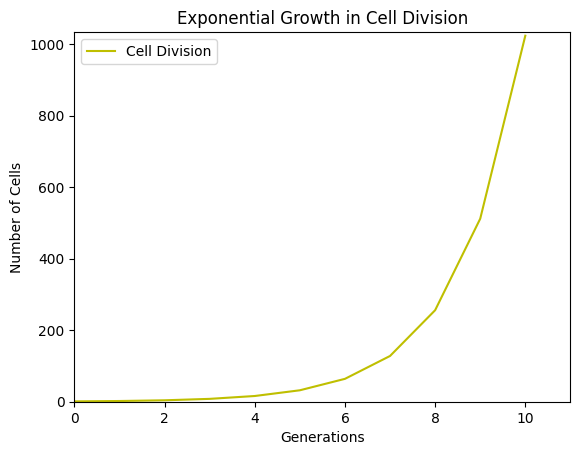

In [3]:
graph_growth_in_cell_division(10)

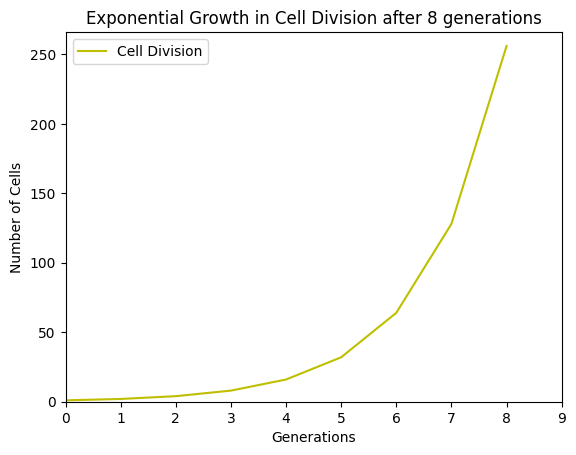

In [4]:
graph_growth_in_cell_division(8, "Exponential Growth in Cell Division after 8 generations")

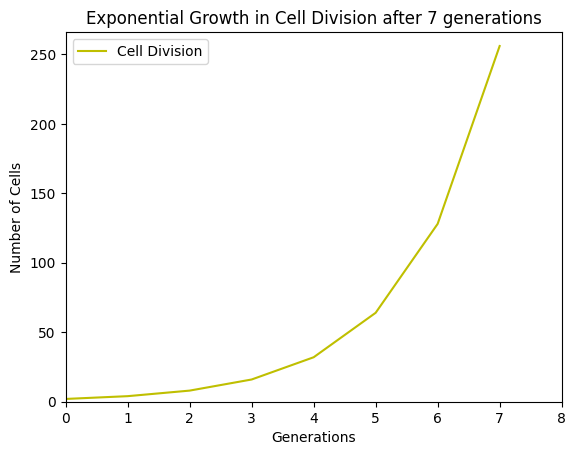

In [5]:
graph_growth_in_cell_division(7, "Exponential Growth in Cell Division after 7 generations", 2)

![Mitosis](../images/Mitosis.jpg)

### 1.2. DNA

<p style="font-size:18px;"> DNA, or deoxyribonucleic acid, is the hereditary material in 
humans and almost all other organisms. It  is the molecule that carries 
genetic information for the development and functioning of an organism.
Nearly every cell in a person’s body has the same DNA. Most DNA is 
located in the cell nucleus (where it is called nuclear DNA), but a small 
amount of DNA can also be found in the mitochondria (where it 
is called mitochondrial DNA or mtDNA). </p>

![DNA](../images/DNA1.jpg)

![Mitochondrial DNA](../images/MitochondrialDNA.jpg)

<p style="font-size:18px;"> The information in DNA is stored as a code made up of four chemical bases: </p> 

#### Adenine (A)

<p style="font-size:18px;"> Its chemical formula is: </p>

$$ C_5H_5N_5 $$

<p style="font-size:18px;">Within a double-stranded DNA molecule, adenine bases on one strand pair 
with thymine bases on the opposite strand. Adenine, pairing with T in DNA, is usually represented as bonding with two hydrogen bonds, holding the DNA together. </p>

![Adenine](../images/Adenine.jpg)

<p style="font-size:18px;"> Adenine forms the nucleoside adenosine when it bonds with ribose, a five-carbon sugar that is a key component of ribonucleic acid (RNA). A nucleoside consists of a nitrogenous base (such as adenine) linked to a pentose sugar. When adenine binds to deoxyribose - a sugar derived from ribose by the removal of a hydroxyl group - it forms deoxyadenosine, a building block of DNA. Adenine also contributes to the formation of adenosine triphosphate (ATP), a vital energy carrier that powers numerous cellular metabolic processes by transferring chemical energy between reactions. </p>

<p style="font-size:18px;">Adenosine formula:</p>

![Adenosine](../images/Adenosine.jpg)

![Nucleotide](../images/Nucleotide.jpg)

![RNA](../images/RNA.jpg)

#### Cytosine (C) & Uracil (U)

<p style="font-size:18px;"> Cytosine's chemical formula is: </p>

$$ C_4H_5N_3O $$

<p style="font-size:18px;"> Uracil's chemical formula is: </p>

$$ C_4H_4N_2O_2 $$

<p style="font-size:18px;"> Within a double-stranded DNA molecule, cytosine bases on one strand pair with guanine bases on the opposite strand. However, it is unstable, and can change into uracil (base found in RNA). This can lead to a point mutation if not repaired (these will be discussed later). </p>

![Cytosine](../images/Cytosine.jpg)

<p style="font-size:18px;">Uracil:</p>

![Uracil](../images/Uracil.jpg)

<p style="font-size:18px;">Cytidine is a structural subunit of ribonucleic acid that consists of cytosine and ribose. Cytidine triphosphate (CTP), an ester (an organic compound made by replacing the hydrogen of an acid by an alkyl or other organic group) of cytidine and triphosphoric acid is formed.</p>

<p style="font-size:18px;">Cytidine formula:</p>

![Cytidine](../images/Cytidine.jpg)

<p style="font-size:18px;">Cytidine triphosphate (CTP) formula:</p>

![CTP](../images/CTP.jpg)

#### Thymine (T)

<p style="font-size:18px;"> Its chemical formula is: </p>

$$ C_5H_6N_2O_2 $$

<p style="font-size:18px;"> Within a double-stranded DNA molecule, thymine bases on one strand pair with adenine bases on the opposite strand. In most cases, thymine is not present in ribonucleic acid structures, as it is replaced by uracil. </p>

![Thymine](../images/Thymine.jpg)

<p style="font-size:18px;"> Thymine binds adenine with two hydrogen bonds. In comparison to G-C base pair, the A-T base pair is weaker. This provides an advantage in placing A-T base pair where DNA strands should be opened easily during replication (explained later). </p>

![Replication](../images/Replication.jpg)

#### Guanine (G)

<p style="font-size:18px;"> Its chemical formula is: </p>

$$ C_5H_5N_5O $$

<p style="font-size:18px;"> Within a double-stranded DNA molecule, guanine bases on one strand pair with cytosine bases on the opposite strand. It binds to cytosine through three hydrogen bonds.  </p>

![Guanine](../images/Guanine.jpg)

<p style="font-size:18px;"> Guanine oxidizes more readily than adenine, the other purine-derivative base in DNA. Guanine is relatively insoluble in water, but it is soluble in dilute acids and bases. </p>

<p style="font-size:18px;"> There is a rule, called Complementary Base Pairing Rule, where:
    
- A pairs with T (2 hydrogen bonds)

- C pairs with G (3 hydrogen bonds).
</p>

![Pairing Rule](../images/Pairing.jpg)

<p style="font-size:18px;"> Human DNA consists of about 3 billion bases, and more than 99.9 percent of those bases are the same in all people. The differing 0.1% contains 
variations that influence our uniqueness. The order, or sequence, of these bases determines the information available for building and maintaining an organism, similar 
to the way in which letters of the alphabet appear in a certain order to 
form words and sentences. </p>

<p style="font-size:18px;"> DNA bases, as we said, pair up with each other, A with T and C with G, to form units called base pairs. Each base is also attached to a sugar molecule and a phosphate molecule. Together, a base, sugar, and phosphate are called a nucleotide. Nucleotides are arranged in two long strands that form a spiral called a double helix. Each strand has a backbone made of alternating sugar (deoxyribose) and phosphate groups. Attached to each sugar is one of four bases. The structure of the double helix is somewhat like a ladder, with the base pairs forming the ladder’s rungs and the sugar and phosphate molecules forming the vertical sidepieces of the ladder. </p>

![Nucleotide](../images/Nucleotide1.jpg)

![DNA](../images/DNA2.jpg)

<p style="font-size:18px;"> An important property of DNA is that it can replicate, or make copies of itself. Each strand of DNA in the double helix can serve as a pattern for duplicating the sequence of bases. This is critical when cells divide because each new cell needs to have an exact copy of the DNA present in the old cell. </p>

<p style="font-size:18px;">Conclusion table for bases:</p>

| Base     | Symbol | Formula              | Pairs With | H Bonds | RNA Equivalent |
|----------|--------|----------------------|------------|---------|----------------|
| Adenine  | A      | $C_5H_5N_5$          | Thymine    | 2       | Uracil (U)     |
| Thymine  | T      | $C_5H_6N_2O_2$       | Adenine    | 2       | Not present    |
| Cytosine | C      | $C_4H_5N_3O$         | Guanine    | 3       | Cytosine (C)   |
| Guanine  | G      | $C_5H_5N_5O$         | Cytosine   | 3       | Guanine (G)    |


<p style="font-size:18px;"> Having talked about DNA, we can explain the topic of Entropy in DNA. Entropy is a concept that quantifies the uncertainty or randomness in a system. In the case of DNA sequences, entropy can be used to measure the diversity or randomness in the distribution of nucleotides (A, T, C, G) in a single-stranded DNA sequence (we do not talk about the double-stranded DNA because the entropy of the DNA molecule itself is zero). The Shannon entropy formula is used to measure the randomness: </p>

$$ H(X) = - \sum_{i=1}^{n} p_i \log_2 p_i $$

where:

$H(X)$ is the Shannon entropy of the sequence.

$p_i$ is the probability of each nucleotide (A, T, C, G) in the sequence.

The sum is over all possible nucleotides in the sequence.

In [6]:
def calculate_entropy_single_strand(dna_sequence):
    """
    Calculate the entropy in a single strand of DNA
    (given the sequence as a string)
    """
    
    nucleotide_counts = Counter(dna_sequence)
    
    sequence_length = len(dna_sequence)
    
    probabilities = [count / sequence_length for count in nucleotide_counts.values()]
    
    entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)
    
    return entropy

In [7]:
def generate_random_dna(length):
    """
    Generate random DNA sequence
    """
    
    return ''.join(random.choice('ATCG') for _ in range(length))

In [8]:
def calculate_entropy_and_graph(start_seq_length, end_seq_length, step_size):
    """
    Calculate entropy for each random DNA and plot it
    (given each DNA start and end lengths and the step size)
    """
    
    sequence_lengths = np.arange(start_seq_length, end_seq_length, step_size)
    entropies = []

    for length in sequence_lengths:
        random_sequence = generate_random_dna(length)
        entropy = calculate_entropy_single_strand(random_sequence)
        entropies.append(entropy)
    
    plt.plot(sequence_lengths, entropies, marker='o', linestyle='-', color='b')
    plt.xlabel('Sequence Length')
    plt.ylabel('Shannon Entropy')
    plt.title('Shannon Entropy vs. Sequence Length for Random DNA Sequences')
    plt.xlim(0, max(sequence_lengths) + 10)
    plt.ylim(0, max(entropies) + 1)
    plt.grid(True)
    plt.show()

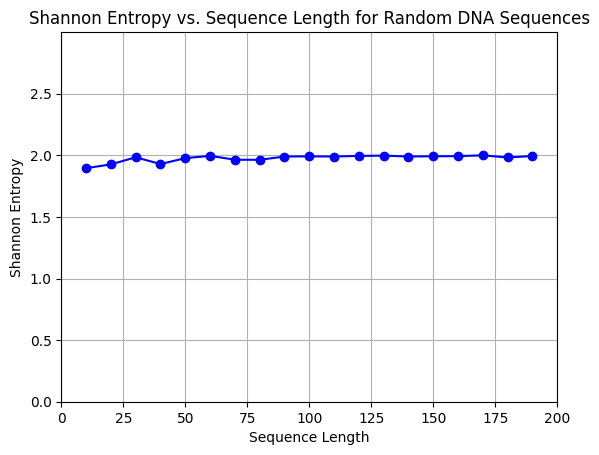

In [9]:
calculate_entropy_and_graph(10, 200, 10)

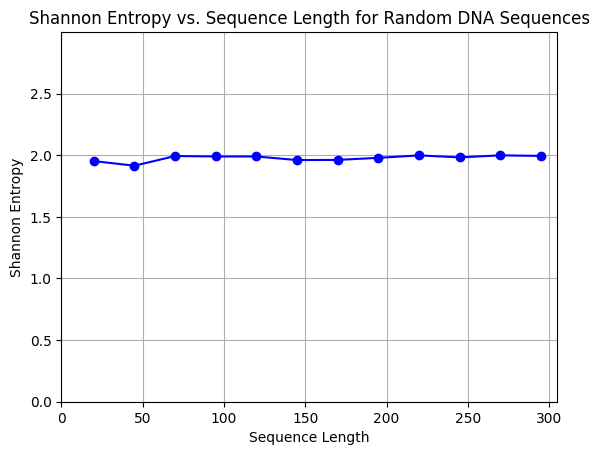

In [10]:
calculate_entropy_and_graph(20, 300, 25)

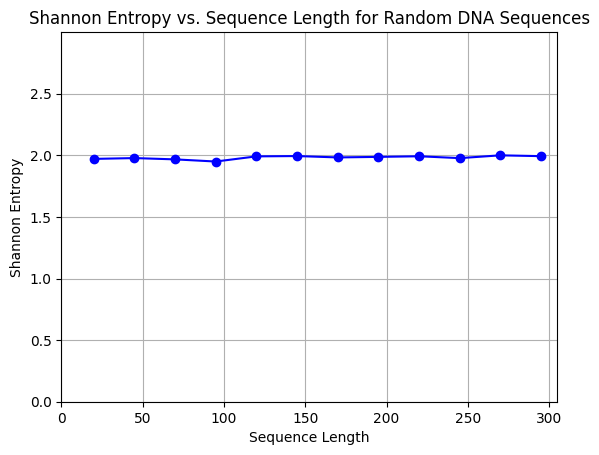

In [11]:
calculate_entropy_and_graph(20, 300, 25)

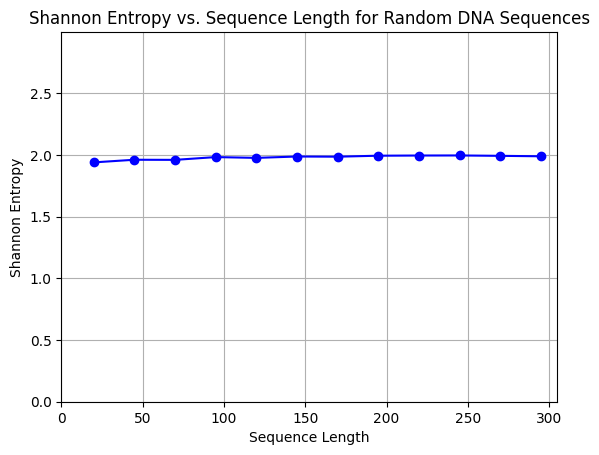

In [12]:
calculate_entropy_and_graph(20, 300, 25)

### 1.3. Genes, Genetics and Genomes

#### Genetics

<p style="font-size:18px;"> Genetics is the study of genes and how traits are passed down from one generation to the next. Our genes carry information that affects our health, our appearance, and even our personality. People who study genes are called geneticists. </p>

![Genetics](../images/Genetics.jpg)

<p style="font-size:18px;">In the past, no one knew what genes were. In the 20th century, scientists figured out that they were actually made of DNA. Genetics forms one of the central pillars of biology and overlaps with many other areas, such as agriculture, medicine, and biotechnology. Genetics as a scientific discipline stemmed from the work of Gregor Mendel in the middle of the 19th century. </p>

![Gregor Mendel](../images/Mendel.jpg)

#### Genome

<p style="font-size:18px;"> The genome is the entire genetic material of an organism. 
It is found in the nucleus of a cell and is composed of DNA. 
The study of the structure and function of the genome is called genomics. </p>

![Genome](../images/Genome.jpg)

<p style="font-size:18px;"> In eukaryotes, genetic material is located in the nucleus. 
The mitochondria (in animals) and chloroplasts (in plants) 
also contain small subsets of genetic material distinct from the 
one found in the nucleus. Prokaryotes, such as bacteria, do not have nuclei. Their genetic 
material is in the cytoplasm and includes small loops of DNA called 
plasmids. </p>

![Prokaryotic Genome](../images/ProkaryoticGenome.jpg)

![Genome in the two types of cells](../images/GenomeInTwoCells.jpg)

<p style="font-size:18px;"> The human genome has great importance for medicine. It enables scientists to search for genes linked to different types of diseases, understand inherited disorders and their treatment, trace human migration patterns from the past. </p>

#### Genes 

<p style="font-size:18px;"> The gene is considered the basic unit of inheritance. Genes are passed from parents to offspring and contain the information needed to specify physical and biological traits. 
They are made up of DNA. </p>

![Genes](../images/Genes.jpg)

<p style="font-size:18px;"> Most genes code for specific proteins or segments of proteins, which have different functions within the body. Humans have approximately 20000 protein-coding genes. However, many genes do not code for proteins — instead, they help control other genes. Typically, people have two copies of each gene, one inherited from each parent. Most genes are the same in all people, but a small number of genes (less than 1%) are slightly different between individuals. Forms of the same gene with small differences in their sequence of DNA bases are called alleles. These small differences contribute to each person’s unique physical features. </p>

![Alleles](../images/Alleles.jpg)

<p style="font-size:18px;"> Scientists keep track of genes by giving them unique names. Because gene names can be long, genes are also assigned symbols, which are short combinations of letters (and sometimes numbers) that represent an abbreviated version of the gene name. </p>

<p style="font-size:18px;"> Genes are composed of DNA, except in some viruses, which have genes consisting of RNA. If the bonds between the bases in the DNA are broken, the two chains unwind, and free nucleotides within the cell attach themselves to the exposed bases of the now-separated chains. The free nucleotides line up along each chain according to the base-pairing rule — A bonds to T, C bonds to G. This process results in the creation of two identical DNA molecules from one original and is the method by which hereditary information is passed from one generation of cells to the next. </p>

### 1.4. Mutations

<p style="font-size:18px;"> A mutation is any permanent change in the DNA sequence that may alter how cells function or how proteins are built. Mutations arise both from errors during DNA replication and from external mutagens, and they form the raw material for evolutionary change—and sometimes disease. </p>

![Mutations](../images/Mutations.jpg)

#### Sources of mutations

<p style="font-size:20px;"> A) Replication Errors </p>

<p style="font-size:18px;"> DNA polymerase copies the genome with very high fidelity but is not flawless, inserting or omitting bases at a raw error rate of roughly 1 in $10^5$ nucleotides.
To reduce mistakes, DNA polymerases employ a three-stage nucleotide selection process and a built-in 5′ -> 3′ exonuclease "proofreading" activity that excises misincorporated nucleotides in real time; together with post-replicative mismatch-repair systems, these mechanisms lower the effective error rate to about 1 in $10^{10}–10^{11}$ bases per replication cycle in bacteria and eukaryotes alike. </p>

![Replication Error](../images/ReplicationError.jpg)

<p style="font-size:20px;"> B) Tautomeric Shifts </p>

<p style="font-size:18px;"> Another source of spontaneous mutation is a phenomenon called tautomeric shift. This is a fancy term for when a DNA base temporarily changes its chemical form into a rare alternative structure (a tautomer). Each of the bases (A, T, C, G) has a common form that normally pairs A-T and C-G. But if a base flips into a rare tautomeric form, its hydrogen bonding pattern changes, causing it to pair with the wrong partner (a mismatched base pair). </p>

![Tauromeric Shifts](../images/TautomericShifts.jpg)

<p style="font-size:20px;"> C) Replication Slippage </p>

<p style="font-size:18px;"> Replication slippage occurs when DNA polymerase loses alignment with the template strand, particularly in regions containing short repeated sequences. This misalignment can cause the formation of a loop in either the new or template strand, potentially leading to insertions or deletions. </p>

![Replication Slippage](../images/Slippage.jpg)

#### Chemical mutagens

<p style="font-size:22px;"> Chemical mutagens are agents that induce mutations by altering the structure of DNA or interfering with its replication. These substances vary in their mechanisms of action, such as base substitution, strand breaks, or disruption of normal base pairing: </p>

<p style="font-size:22px;"> A) Base Analogs </p>

<p style="font-size:18px;"> These are fake nucleotides – molecules that resemble the normal bases (A, T, C, G) well enough that DNA polymerase might insert them into DNA in place of a real base. However, base analogs don’t always behave like the normal bases in terms of pairing. For example, 5-bromouracil (5-BU) is a base analog of thymine. It can be inserted instead of thymine, and it will pair with adenine like a normal T would. The trouble is that 5-BU can shift into a different form that pairs with guanine. This means if 5-BU gets incorporated, it can later cause a T-A base pair to be read as a C-G pair after a couple of DNA replications. </p>

![5-BU](../images/5BU.jpg)

<p style="font-size:22px;"> B) Deaminating Agents </p>

<p style="font-size:18px;"> These are chemicals that remove amino ($-NH_2$) groups from the nucleotide bases, changing one base into another. A common example is nitrous acid (formed from nitrites, which can be found in preservatives). Nitrous acid can deaminate cytosine, turning it into uracil.
Nitrous acid can also deaminate adenine to hypoxanthine, which pairs with cytosine (causing an A-T to G-C mutation). </p>

![Nitrous Acid Mutations](../images/NitrousAcid.jpg)

<p style="font-size:22px;"> C) Alkylating Agents </p>

<p style="font-size:18px;"> These chemicals add alkyl groups (such as methyl or ethyl groups – small alkyl groups composed of carbon chains) onto DNA bases. By attaching these extra chemical groups, alkylating agents change how bases pair and can even cause structural damage to DNA. For example, adding a methyl group to guanine can make it mispair with thymine instead of cytosine. Some alkylating agents can create cross-links between the two strands of the DNA double helix or remove bases entirely. </p>

![Alkylating Agents](../images/AlkylatingAgents.jpg)

<p style="font-size:22px;"> D) Intercalating Agents </p>

<p style="font-size:18px;"> These are flat, planar molecules that insert 
themselves between adjacent base pairs in the DNA double helix. By sliding in between bases, an intercalating agent distorts the regular spacing of the DNA structure. During DNA replication, this can confuse DNA polymerase. It may cause the polymerase to accidentally insert an extra nucleotide opposite the intercalating molecule or skip a nucleotide that it should have added. </p>

![Intercalating Agents](../images/IntercalatingAgents.jpg)

#### Physical mutagens

<p style="font-size:22px;"> Physical mutagens are environmental factors, usually forms of radiation or heat, that can damage DNA and increase mutation rates. Physical mutagens often cause physical breaks or distortions in the DNA structure: </p>

<p style="font-size:22px;"> A) UV Radiation (Ultraviolet Light) </p>

<p style="font-size:18px;"> UV light is strongly absorbed by the DNA bases, especially adjacent 
pyrimidines (T or C). It can make two neighboring thymine bases bond together covalently, forming a thymine dimer. This dimer creates a distortion in the DNA helix. When DNA polymerase encounters a thymine dimer during replication, it can stall or insert the wrong bases. </p>

![UV Radiation Mutation](../images/UVRadiation.jpg)

<p style="font-size:22px;"> B) Ionizing Radiation </p>

<p style="font-size:18px;"> Examples of ionizing radiation include X-rays, gamma rays, and high-energy particles. These rays can break the chemical bonds in DNA’s structure. They often cause single-strand breaks or more seriously double-strand breaks in DNA. Ionizing radiation is highly mutagenic: the incorrect rejoining of DNA or base modifications can introduce mutations.  </p>

![Ionizing Radiation Mutation](../images/IonizingRadiation.jpg)

<p style="font-size:22px;"> C) Heat (High Temperature) </p>

<p style="font-size:18px;"> Heat causes the hydrogen bonds between DNA strands to weaken. If the temperature rises enough, the two strands of the DNA double helix can separate (a process called DNA denaturation) - essentially, the DNA "unzips" into single strands because the normal base pairing is disrupted. This alone is not a mutation, but it makes DNA vulnerable.   </p>

![DNA Denaturation](../images/DNADenaturation.jpg)

#### Types of mutations

<p style="font-size:22px;"> A) Point mutations </p>

<p style="font-size:18px;"> A point mutation involves a change in a single nucleotide base pair in the DNA sequence. These mutations can arise spontaneously during DNA replication or be induced by external factors such as radiation. </p>

<p style="font-size:20px;"> Subtypes: </p>

<p style="font-size:16px;"> Transition Mutations - The substitution of a purine base with another purine ($A \leftrightarrow G$) or a pyrimidine base with another pyrimidine ($C \leftrightarrow T$). These are typically less disruptive due to the similarity between the bases involved. </p>

<p style="font-size:16px;"> Transversion Mutations - The substitution of a purine base with a pyrimidine base or vice versa ($A \leftrightarrow C$, $G \leftrightarrow T$ and more). These mutations are less common and can have more significant effects on protein function. A reversible transversion is possible in the case of spontaneous mutation. A transversion, however, has a more pronounced effect as the third nucleotide codon (a sequence of three consecutive nucleotides in the DNA or 
RNA molecule that codes for a specific amino acid) of the DNA is less tolerant to transversion. </p>

![Transitions and Transversions](../images/TransitionsTransversion.jpg)

<p style="font-size:20px;"> Functional Impacts: </p>

<p style="font-size:16px;"> Silent Mutations - A change in the nucleotide sequence that does not alter the amino acid sequence of the protein, often due to the redundancy of the genetic code. No observable effect is observed on the phenotype (traits that can be seen, such as appearance, behavior, or metabolism) of the organism as the result of the mutation. </p>

<p style="font-size:16px;"> Missense Mutations - A single nucleotide change results in the substitution of a different amino acid in the protein. Depending on the nature of the amino acid change, this can affect protein function. A missense mutation is commonly associated with diseases like Epidermolysis bullosa, sickle-cell disease, and ALS. However, all missense mutations are not as harmful as in some cases; an amino acid is replaced by another amino acid of similar properties, which results in a functional protein.  </p>

<p style="font-size:16px;"> Nonsense Mutations - A nucleotide change that converts a codon encoding an amino acid into a stop codon (codon that signals a halt to protein synthesis in the cell), leading to premature termination of protein synthesis and often resulting in a nonfunctional protein. If the mutation is close to the original stop codon, the functional effect might be less severe than if the mutation is far from the stop codon. </p>

![Point Mutations Examples](../images/PointMutations.jpg)

<p style="font-size:22px;"> B) Insertion and Deletion Mutations (Indels) </p>

<p style="font-size:18px;"> These mutations involve the addition (insertion) or removal (deletion) of nucleotides in the DNA sequence: </p>

<p style="font-size:16px;"> Frameshift Mutations - Insertions or deletions that are not in multiples of three nucleotides alter the reading frame of the gene, leading to a completely different translation from the original, often producing a nonfunctional protein. The reading of the codon after the point of mutation results in different amino acids from the original. Frameshifts usually inactivate a gene because every downstream codon is altered. </p>

<p style="font-size:16px;"> In-Frame Mutations - Insertions or deletions that are in multiples of three nucleotides result in the addition or loss of whole amino acids without shifting the reading frame, which may still affect protein function. </p>

![Indel Mutations](../images/FrameShift.jpg)

<p style="font-size:22px;"> C) Chromosomal Mutations </p>

<p style="font-size:18px;"> These mutations involve changes in the structure or number of entire chromosomes (threadlike structures of nucleic acids and protein found in the nucleus of most living cells, carrying genetic information in the form of genes), affecting large segments of DNA: </p>

<p style="font-size:16px;"> Inversion - A chromosome segment is reversed end to end. In an inversion, the affected segment is flipped in orientation, potentially disrupting the function of genes in that region. </p>

<p style="font-size:16px;"> Deletion - A portion of the chromosome is lost or deleted, leading to the loss of essential genetic material. This can cause severe developmental or functional consequences. </p>

<p style="font-size:16px;"> Translocation - A segment of one chromosome is transferred to another chromosome. This can lead to gene fusion or misregulation. </p>

![Chromosomial Mutations](../images/ChromosomialMutations.jpg)

<p style="font-size:22px;"> D) Repeat Expansion Mutations </p>

<p style="font-size:18px;"> These mutations involve the increase in the number of copies of a short DNA sequence, often in the form of trinucleotide repeats. </p>

<p style="font-size:18px;"> For example, Huntington's disease is caused by the expansion of a CAG repeat in the HTT gene, leading to the production of an abnormally long protein that disrupts normal cellular function. </p>

![Repeat Expansion Mutation](../images/RepeatExpansionMutation.jpg)

In [13]:
def apply_point_mutations(dna_sequence, mutation_rate):
    """
    Function for a chance of applying a point mutation to a DNA sequence
    (with a desired mutation rate - percentage for each base to mutate)
    """
    
    dna = np.array(list(dna_sequence))
    
    transitions = {
        'A': 'G', 
        'G': 'A', 
        'C': 'T', 
        'T': 'C'
    }
    
    transversions = {
        'A': ['C','T'],
        'G': ['C','T'],
        'C': ['A','G'],
        'T': ['A','G'],
    }
    
    # Make an array of boolean values (if a certain base will mutate)
    # based on random values
    rand_vals = np.random.random(len(dna)) < mutation_rate

    # Make an array of boolean values (if a certain base will undergo transition)
    # based on random values (mix the two arrays - bases which are chosen for both
    # mutations will undergo transition
    transition_mask = rand_vals & (np.random.random(len(dna)) < 0.5)  

    # Make an array of boolean values (if a certain base will undergo transversion)
    # based on random values (mix the two arrays - bases which are chosen for both
    # mutations will undergo transversion
    transversion_mask = rand_vals & ~transition_mask
    
    dna[transition_mask] = [transitions[base] for base in dna[transition_mask]]

    dna[transversion_mask] = [
        np.random.choice(transversions[b])
        for b in dna[transversion_mask]
    ]
    
    return ''.join(dna)

In [14]:
initial_dna = "ATCGATCGATCG"
mutated_dna = apply_point_mutations(initial_dna, 0.1)
print("Original DNA:", initial_dna)
print("Mutated DNA:", mutated_dna)

Original DNA: ATCGATCGATCG
Mutated DNA: ATCGATAGATCG


In [15]:
def apply_indels(seq, ins_rate, del_rate):
    """
    Function for a chance of applying INDEL mutations (insertions/deletions)
    with a desired mutation rate - percentage for each base to be inserted/deleted
    """
    
    dna = np.array(list(seq))

    # Make an array of boolean values (if a certain base would be deleted)
    keep_mask = np.random.random(dna.size) > del_rate        

    # Delete the needed bases and continue with the left ones
    dna = dna[keep_mask]                                

    # Make an array of boolean values (if a certain base would be inserted before the current one)
    insert_mask = np.random.random(dna.size) < ins_rate

    # Make an array of nucleotide bases (their number is based on the number of insertions needed)
    rand_insert = np.random.choice(list('ACGT'), insert_mask.sum())

    output_DNA = []
    insert_index = 0
    for base, need_insert in zip(dna, insert_mask):
        if need_insert:
            # Insert the random base before the current one if needed
            output_DNA.append(rand_insert[insert_index])
            insert_index += 1
        output_DNA.append(base)
    return ''.join(output_DNA)


In [16]:
initial_dna = "ATCGATCGATCG"          

print("Original: ", initial_dna)

ins_rate = 0.05      
del_rate = 0.09  

mutated_dna = apply_indels(initial_dna, ins_rate, del_rate)

print("After indels: ", mutated_dna)

Original:  ATCGATCGATCG
After indels:  ATCGATCGATCG


In [17]:
def simulate(generations, minimal_DNA_length,
             point_mutation_rate, insertion_rate, deletion_rate):
    """
    Function for simulating applying different mutations on a random DNA sequence
    (receiving the number of generations to apply mutations, minimal DNA length for the
    random DNA sequence and the rates (%) for mutations - point and INDEL)
    """

    DNA_sequence = ''.join(np.random.choice(list('ACGT'), 
                                   size=minimal_DNA_length))
    DNA_lengths = [len(DNA_sequence)]

    for _ in range(generations):
        DNA_sequence = apply_point_mutations(DNA_sequence, point_mutation_rate)
        DNA_sequence = apply_indels(DNA_sequence, insertion_rate, deletion_rate)
        DNA_lengths.append(len(DNA_sequence))

    plt.plot(range(generations+1), DNA_lengths, marker='o')
    plt.xlabel("Generation"); 
    plt.ylabel("Sequence length")
    plt.title("Length drift from point‑mutations + indels")
    plt.grid(); 
    plt.show()

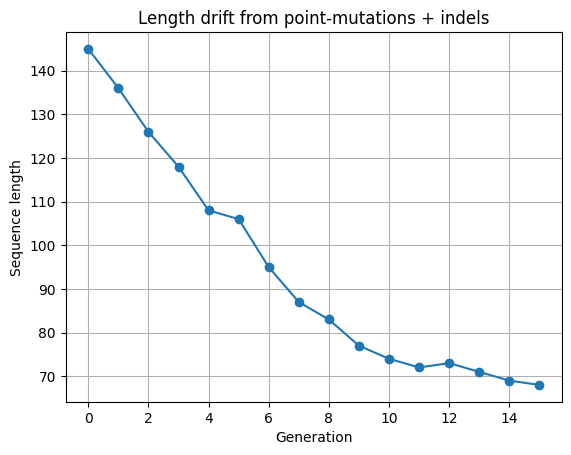

In [18]:
simulate(15, 145, 0.05, 0.05, 0.09)

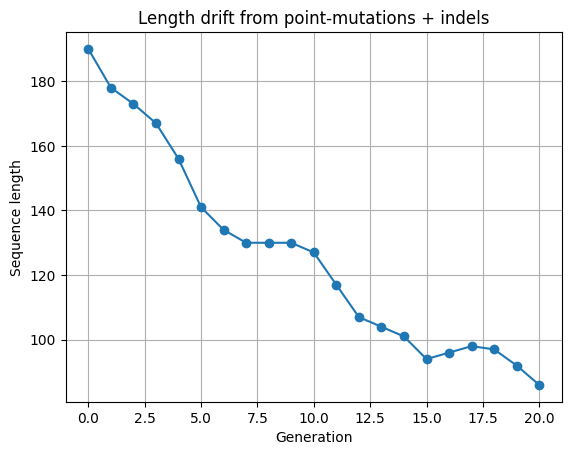

In [19]:
simulate(20, 190, 0.05, 0.05, 0.09)

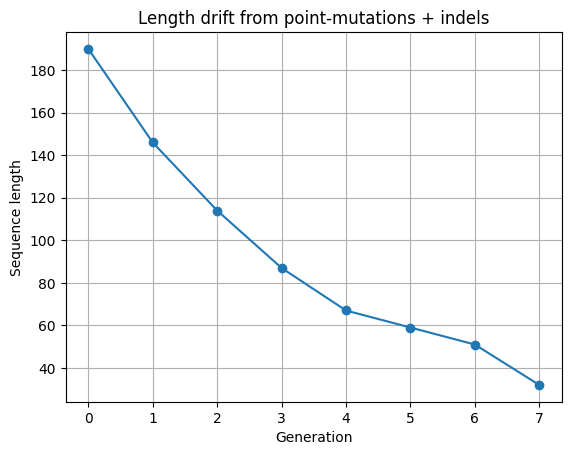

In [20]:
simulate(7, 190, 0.15, 0.25, 0.39)

<p style="font-size:18px;"> As we can notice, the number of DNA bases in the sequence always goes down - this mean that the deletions mutations happen the most frequently (point mutations do not have influence over the number of bases) </p>

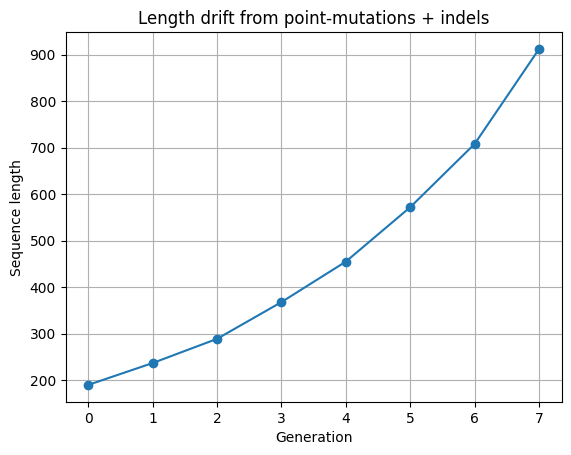

In [21]:
simulate(7, 190, 0.15, 0.25, 0)

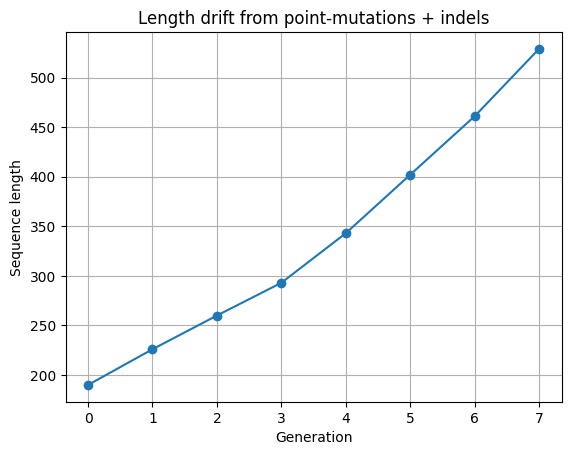

In [22]:
simulate(7, 190, 0, 0.15, 0)

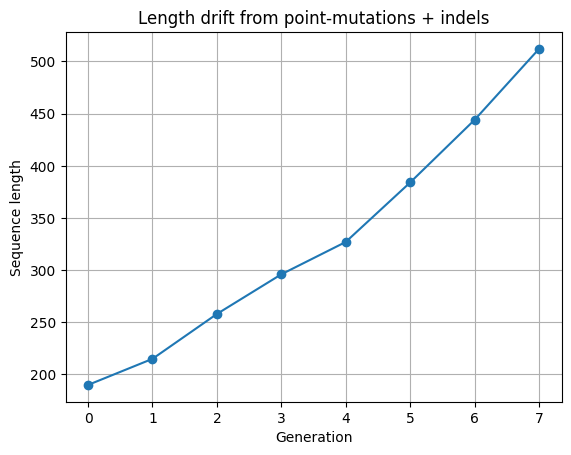

In [23]:
simulate(7, 190, 0.05, 0.15, 0)

<p style="font-size:18px;"> When we increase the chance for insertions and lower the chance for deletions, we can notice that the number of bases highers up over the generations. This means that our mutations applying functions work as expected. </p>

## 2. Mathematical Representations of Biological Structures

### 2.1. DNA

<p style="font-size:18px;"> First, we treat a DNA strand not as text but as a sequence over the four-letter combination: {A, C, G, T}. We map each base to an integer: A - 0, C - 1, G - 2, T - 3 - so that any length-$n$ DNA string becomes a NumPy array of shape ($n$, ) with values $ \in $ {0, 1, 2, 3}. This "integer encoding" makes it easy for us to count nucleotide frequencies, compute Shannon entropy, etc. </p>

<p style="font-size:18px;"> We also introduce the idea of "sequence space": the total number of possible DNA strings of length $n$ is: </p>

$$ X = 4 ^ n $$

In [24]:
def encode_dna_or_rna(sequence, mapping):
    """
    Function to transform DNA / RNA to a desired mapping
    """
    
    return np.array([mapping[base] for base in sequence])

In [25]:
mapping = {'A':0,'C':1,'G':2,'T':3} # desired mapping

In [26]:
DNAs = ["ACGTAC", "ACTTAC", "CTAGGT", "CACTGA", "GGCTAA"] # DNA random examples
encodedDNAs = [encode_dna_or_rna(DNA, mapping) for DNA in DNAs]

for encoded in encodedDNAs:
    print(encoded)

[0 1 2 3 0 1]
[0 1 3 3 0 1]
[1 3 0 2 2 3]
[1 0 1 3 2 0]
[2 2 1 3 0 0]


In [27]:
def visualize_sequence_space(sequence_lengths):
    """
    Function for plotting the sequence space's growth for desired DNA / RNA sequences
    """
    n = np.arange(1, sequence_lengths + 1)
    counts = 4.0 ** n
    
    plt.plot(n, counts, 'o-', label='4ⁿ')      
    plt.xlabel('Sequence length n')
    plt.ylabel('Number of possible sequences')
    plt.title('DNA / RNA Sequence Space Explosion')     
    plt.yscale('log')
    plt.legend()
    plt.show()

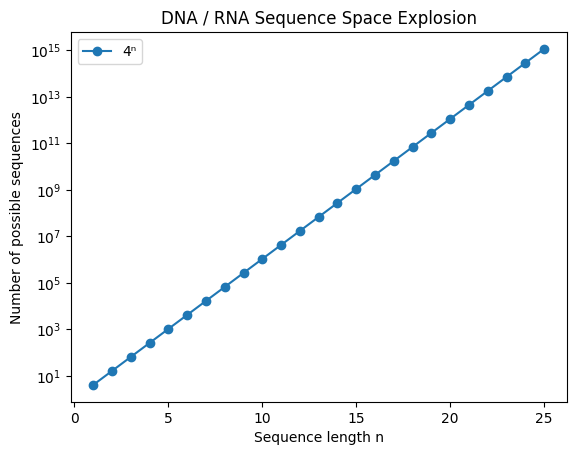

In [28]:
visualize_sequence_space(25)

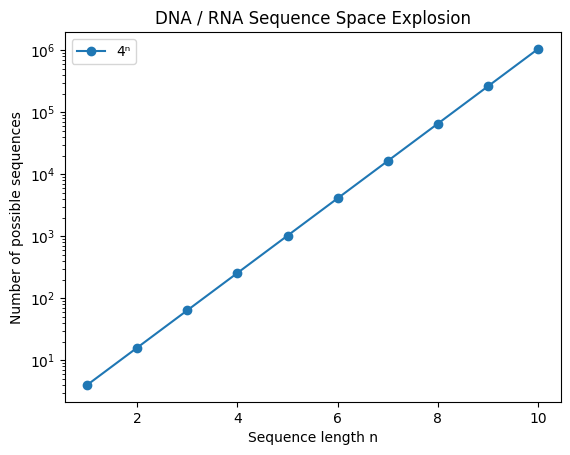

In [29]:
visualize_sequence_space(10)

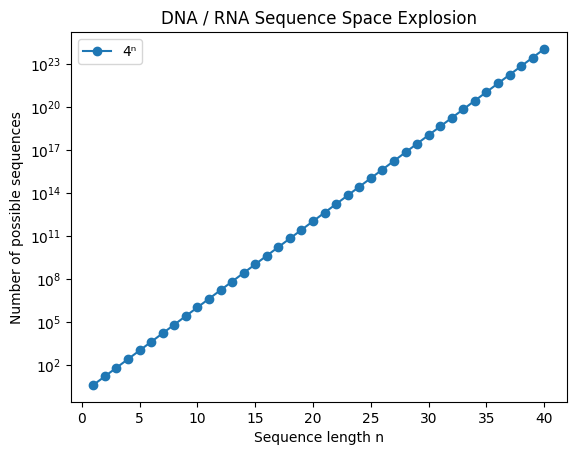

In [30]:
visualize_sequence_space(40)

### 2.2. RNA

<p style="font-size:18px;"> RNA is handled in exactly the same way but with U replacing T. We simply redefine our mapping so that U $\rightarrow$ 3. The sequence space remains:
    $$ X =  4 ^ n $$
 , and any functions written to process DNA sequences can be reused with only this one-line change in the mapping dictionary. </p>

In [31]:
mapping = {'A':0,'C':1,'G':2,'U':3} # desired mapping

In [32]:
RNAs = ["AUGCGA", "ACUUAC", "CUAGGU", "CACUGA", "GGCUAA"] # RNA random examples
encodedRNAs = [encode_dna_or_rna(RNA, mapping) for RNA in RNAs]

for encoded in encodedRNAs:
    print(encoded)

[0 3 2 1 2 0]
[0 1 3 3 0 1]
[1 3 0 2 2 3]
[1 0 1 3 2 0]
[2 2 1 3 0 0]


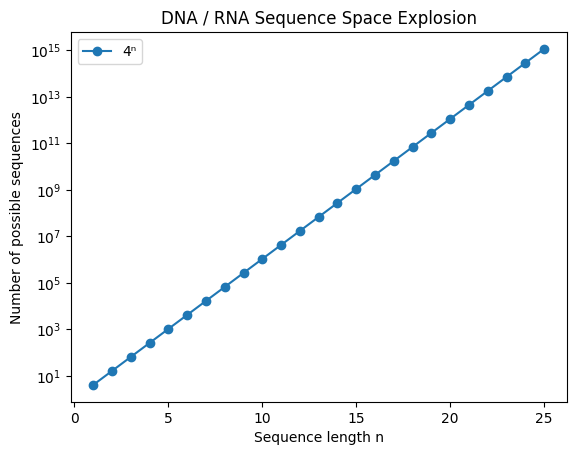

In [33]:
visualize_sequence_space(25)

### 2.3. Codons

<p style="font-size:18px;"> When we move to codons, we use our integer-encoded sequence by grouping it into triplets. Each codon thus becomes a 3-element tuple $ \in  $ {0,1,2,3} $ ^ 3 $. As we know, codons are triplets of nucleotide bases, so the number of possible codons is $ 4^3 = 64 $ codons (4 bases for 3 nucleotides). There are 3 STOP codons - UAA, UAG, UGA - they signal a halt to protein synthesis in the cell. The other 61 codons are for specifying amino acids. Most amino acids are encoded by multiple codons (because the count of amino acids is 20, but we have 61 codons). For example, leucine, which is one of the 3 essential branched chain amino acids is encoded by the codons UUA, UUG, CUU, CUC, CUA, and CUG. On the other hand, methionine has exactly one codon - AUG. The codons we stated are in the transfer RNA (type of RNA). </p>

![Codon Chart](../images/CodonChart.jpg)

![Codon Chart 2](../images/CodonChart2.jpg)

<p style="font-size:18px;"> We could represent them as 
3-dimensional vectors, whose components are in the set {0,1,2,3} (from our
numerical representation).
When we translate the codons (synthesise a protein or encounter a STOP
codon), we could represent this process as a function: </p>

$$ \text{translate}: \set{0,1,2,3} ^ 3 ⟶ (\text{20 amino acids}) \cup (\text{STOP}). $$

- the translate function's domain is the triple of nucleotides and the
codomain is 20 possible amino acids or a STOP codon.

In [34]:
def encode_codons(sequence, mapping):
    """
    Function to encode codons using the DNA / RNA sequence
    """
    
    encoded_sequence = encode_dna_or_rna(sequence, mapping)

    codons = []
    
    for i in range(0, len(encoded_sequence) - (len(encoded_sequence) % 3), 3):
        triple = encoded_sequence[i:i+3]
        codons.append((int(triple[0]), int(triple[1]), int(triple[2])))
        
    return codons

In [35]:
mapping_DNA = {'A':0,'C':1,'G':2,'T':3} 
DNAs = ["CAGTCA", "ACGTAC", "ACATGT", "CATGGA", "AGCATA"] 

mapping_RNA = {'A':0,'C':1,'G':2,'U':3}
RNAs = ["AUUAGA", "GUAUAC", "CGUUGU", "GACUGA", "GGCGUA"]

encoded_DNA_codons = [encode_codons(DNA, mapping_DNA) for DNA in DNAs]
encoded_RNA_codons = [encode_codons(RNA, mapping_RNA) for RNA in RNAs]

for encoded_DNA_codon, DNA in zip(encoded_DNA_codons, DNAs):
    print(f"{DNA} - {encoded_DNA_codon}")

print()

for encoded_RNA_codon, RNA in zip(encoded_RNA_codons, RNAs):
    print(f"{RNA} - {encoded_RNA_codon}")

CAGTCA - [(1, 0, 2), (3, 1, 0)]
ACGTAC - [(0, 1, 2), (3, 0, 1)]
ACATGT - [(0, 1, 0), (3, 2, 3)]
CATGGA - [(1, 0, 3), (2, 2, 0)]
AGCATA - [(0, 2, 1), (0, 3, 0)]

AUUAGA - [(0, 3, 3), (0, 2, 0)]
GUAUAC - [(2, 3, 0), (3, 0, 1)]
CGUUGU - [(1, 2, 3), (3, 2, 3)]
GACUGA - [(2, 0, 1), (3, 2, 0)]
GGCGUA - [(2, 2, 1), (2, 3, 0)]


### 2.4. Proteins

<p style="font-size:18px;"> Proteins themselves we represent analogously. Once a DNA or RNA sequence has been translated, the resulting string of amino-acid symbols is encoded either as an integer array of length $L$ (there are 20 standard amino acids, so we map each amino acid to index from 0 - 19). Also, each protein could be represented as a matrix, each row being an array of 
the nucleotide sequences. This numeric form lets us compute amino-acid frequencies, entropy of protein sequences, etc. </p>

<p style="font-size:18px;"> Here are all 20 amino acids along with their 3-letter and 1-letter codes: </p>

$$ \begin{array}{|l|c|c|}
\hline
\textbf{Amino acid} & \textbf{3-letter code} & \textbf{1-letter code} \\ \hline
Alanine           & \texttt{Ala} & \texttt{A} \\ \hline
Arginine          & \texttt{Arg} & \texttt{R} \\ \hline
Asparagine        & \texttt{Asn} & \texttt{N} \\ \hline
Aspartic acid     & \texttt{Asp} & \texttt{D} \\ \hline
Cysteine          & \texttt{Cys} & \texttt{C} \\ \hline
Glutamine         & \texttt{Gln} & \texttt{Q} \\ \hline
Glutamic acid     & \texttt{Glu} & \texttt{E} \\ \hline
Glycine           & \texttt{Gly} & \texttt{G} \\ \hline
Histidine         & \texttt{His} & \texttt{H} \\ \hline
Isoleucine        & \texttt{Ile} & \texttt{I} \\ \hline
Leucine           & \texttt{Leu} & \texttt{L} \\ \hline
Lysine            & \texttt{Lys} & \texttt{K} \\ \hline
Methionine        & \texttt{Met} & \texttt{M} \\ \hline
Phenylalanine     & \texttt{Phe} & \texttt{F} \\ \hline
Proline           & \texttt{Pro} & \texttt{P} \\ \hline
Serine            & \texttt{Ser} & \texttt{S} \\ \hline
Threonine         & \texttt{Thr} & \texttt{T} \\ \hline
Tryptophan        & \texttt{Trp} & \texttt{W} \\ \hline
Tyrosine          & \texttt{Tyr} & \texttt{Y} \\ \hline
Valine            & \texttt{Val} & \texttt{V} \\ \hline
\end{array} $$

![Amino Acids](../images/AminoAcids.jpg)

In [36]:
def encode_protein(amino_acid_sequence, amino_acid_mapping):
    """
    Turn an amino-acid string into an int array.
    """
    
    return np.array([amino_acid_mapping[amino_acid] for amino_acid in amino_acid_sequence])

In [37]:
amino_acid_mapping = {
    'A':0, 'R':1, 'N':2, 'D':3, 'C':4,
    'Q':5, 'E':6, 'G':7, 'H':8, 'I':9,
    'L':10,'K':11,'M':12,'F':13,'P':14,
    'S':15,'T':16,'W':17,'Y':18,'V':19
} # 1-letter code mapping

In [38]:
protein = "MKTAYIAKQRQISFVKSHFSRQ" # random protein
encoded = encode_protein(protein, amino_acid_mapping)

print(encoded)

[12 11 16  0 18  9  0 11  5  1  5  9 15 13 19 11 15  8 13 15  1  5]


In [39]:
def protein_to_dna(protein_seq, codon_map):
    """
    Reverse-translate a protein sequence into a DNA sequence by mapping
    each amino acid to its representative codon.
    """
    
    dna_bases = []
    for i, aa in enumerate(protein_seq):
        codon = codon_map.get(aa)
        dna_bases.append(codon + " ")
    return ''.join(dna_bases)

In [40]:
amino_acid_to_codon_mapping = {
    'A': 'GCT',  
    'R': 'CGT', 
    'N': 'AAT', 
    'D': 'GAT',  
    'C': 'TGT', 
    'Q': 'CAA',  
    'E': 'GAA',  
    'G': 'GGT',  
    'H': 'CAT', 
    'I': 'ATT',  
    'L': 'CTT',  
    'K': 'AAA',  
    'M': 'ATG',  
    'F': 'TTT',  
    'P': 'CCT',
    'S': 'TCT', 
    'T': 'ACT',  
    'W': 'TGG',  
    'Y': 'TAT',  
    'V': 'GTT',  
    '*': 'TAA',  # Stop codon
} 
# each protein is mapped to only 1 codon even though some proteins have multiple codons - here
# we try to avoid ambiguity

In [41]:
proteins = ["MDSKGSSQKGSRLLLLLVVSNLLLCQGVVSTPVCPNGPGNCQVSLRDLFDRAVMVSHYIHDLSSEMFNEFDKRYAQGKGFITMALNSCHTSSLPTPEDKEQAQQTHHEVLMSLILGLLRSWNDPLYHLVTEVRGMKGAPDAILSRAIEIEEENKRLLEGMEMIFGQVIPGAKETEPYPVWSGLPSLQTKDEDARYSAFYNLLHCLRRDSSKIDTYLKLLNCRIIYNNNC",
           "MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK",
           "CDAFVGTWKLVSSENFDDYMKEVGVGFATRKVAGMAKPNMIISVNGDLVTIRSESTFKNTEISFKLGVEFDEITADDRKVKSIITLDGGALVQVQKWDGKSTTIKRKRDGDKLVVECVMKGVTSTRVYERA"]
# some popular proteins (Bovine Prolactin Precursor, Calmodulin, Sample Antibody Fragment)

DNA_sequences = [protein_to_dna(protein, amino_acid_to_codon_mapping) for protein in proteins]

for DNA in DNA_sequences:
    print(DNA)
    print()
    print()

ATG GAT TCT AAA GGT TCT TCT CAA AAA GGT TCT CGT CTT CTT CTT CTT CTT GTT GTT TCT AAT CTT CTT CTT TGT CAA GGT GTT GTT TCT ACT CCT GTT TGT CCT AAT GGT CCT GGT AAT TGT CAA GTT TCT CTT CGT GAT CTT TTT GAT CGT GCT GTT ATG GTT TCT CAT TAT ATT CAT GAT CTT TCT TCT GAA ATG TTT AAT GAA TTT GAT AAA CGT TAT GCT CAA GGT AAA GGT TTT ATT ACT ATG GCT CTT AAT TCT TGT CAT ACT TCT TCT CTT CCT ACT CCT GAA GAT AAA GAA CAA GCT CAA CAA ACT CAT CAT GAA GTT CTT ATG TCT CTT ATT CTT GGT CTT CTT CGT TCT TGG AAT GAT CCT CTT TAT CAT CTT GTT ACT GAA GTT CGT GGT ATG AAA GGT GCT CCT GAT GCT ATT CTT TCT CGT GCT ATT GAA ATT GAA GAA GAA AAT AAA CGT CTT CTT GAA GGT ATG GAA ATG ATT TTT GGT CAA GTT ATT CCT GGT GCT AAA GAA ACT GAA CCT TAT CCT GTT TGG TCT GGT CTT CCT TCT CTT CAA ACT AAA GAT GAA GAT GCT CGT TAT TCT GCT TTT TAT AAT CTT CTT CAT TGT CTT CGT CGT GAT TCT TCT AAA ATT GAT ACT TAT CTT AAA CTT CTT AAT TGT CGT ATT ATT TAT AAT AAT AAT TGT 


ATG GCT GAT CAA CTT ACT GAA GAA CAA ATT GCT GAA TTT AAA GAA GCT TTT TCT CTT TTT G

### 2.5. Point Mutations

<p style="font-size:18px;"> A single nucleotide is replaced by another - either a transition (purine - purine (A or G) or pyrimidine - pyrimidine (C, U or T) or a transversion (purine - pyrimidine). We model this by using a stochastic matrix $M$. A stochastic matrix is a square matrix whose columns are probability vectors - here, $4 \times 4$ matrix where each entry $M_{ij}$ represents the probability that base $i$ (e.g. $A$) mutates to base $j$ (e.g. $G$) in one generational step. Because probabilities must sum to one, every row of $M$ satisfies: </p>

$$ \sum_{i, j \in \set{A, C, G, T}} M_{ij} = 1 $$

<p style="font-size:18px;"> OR </p>

$$ \sum_{i, j \in \set{A, C, G, U}} M_{ij} = 1 $$

<p style="font-size:18px;"> Upper for DNA, lower for RNA </p>

<p style="font-size:18px;">  Repeated application of this matrix simulates successive rounds of mutation: if $f(t)$ is the current distribution of nucleotides, then the formula which gives the next distribution after one mutation cycle is: </p>

$$ f(t+1) = f(t)M $$

In [42]:
def nucleotide_frequencies(sequence):
    """
    Function to compute frequencies of bases in a DNA sequence
    """
    
    counts = {base: sequence.count(base) for base in 'ACGT'}
    
    total_bases = len(sequence)
    
    return {base: counts[base] / total_bases for base in 'ACGT'}

In [43]:
def simulate_point_mutation_dynamics(initial_sequence, mutation_rate, generations):
    """
    Function to create a frequency history - for each generation we compute the
    frequencies of bases in its DNA
    """
    
    frequencies_history = []
    
    for generation in range(generations + 1):
        frequencies_history.append(nucleotide_frequencies(initial_sequence))
        initial_sequence = apply_point_mutations(initial_sequence, mutation_rate)
    
    return frequencies_history

In [44]:
def plot_mutation_dynamics(history):
    """
    Plot on a graph the mutation history of a desired number of generations
    """
    
    generations = list(range(len(history)))
    plt.figure(figsize=(10, 4))
    
    for base in 'ACGT':
        frequencies = [h[base] for h in history]
        plt.plot(generations, frequencies, marker='o', label=base)
    
    plt.xlabel('Generation')
    plt.ylabel('Frequency')
    plt.title('Point‐Mutation Dynamics')
    plt.legend()
    plt.grid(True)

    final_freqencies = history[-1]
    values = [final_freqencies[b] for b in 'ACGT']
    plt.figure(figsize=(6, 4))
    plt.bar(list('ACGT'), values, color=['b','g','r','y'], alpha=0.7)
    plt.xlabel('Base')
    plt.ylabel('Final Frequency')
    plt.title('Histogram of Final Nucleotide Frequencies')

    y_ticks = np.arange(0, 1.01, 0.05)     
    plt.yticks(y_ticks, [f"{t:.2f}" for t in y_ticks])
    
    plt.ylim(0, max(y_ticks))
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

We will test our function for 20 generations with initial sequence of 1000 bases

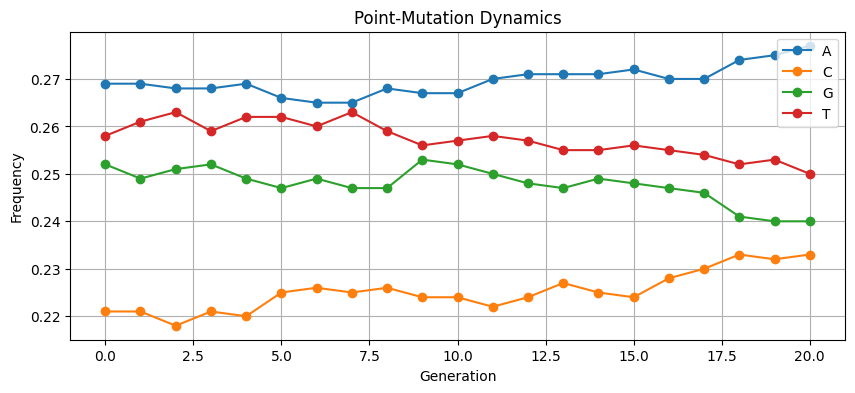

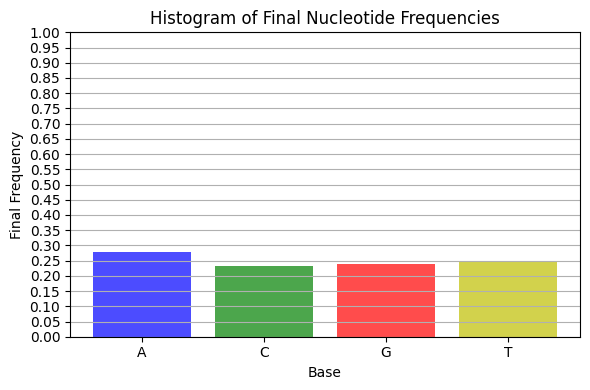

In [45]:
initial = ''.join(np.random.choice(list('ACGT'), size=1000))
history = simulate_point_mutation_dynamics(initial, 0.01, 20)
plot_mutation_dynamics(history)

Every time, the chance for noticeable fluctuations in base frequencies is random.

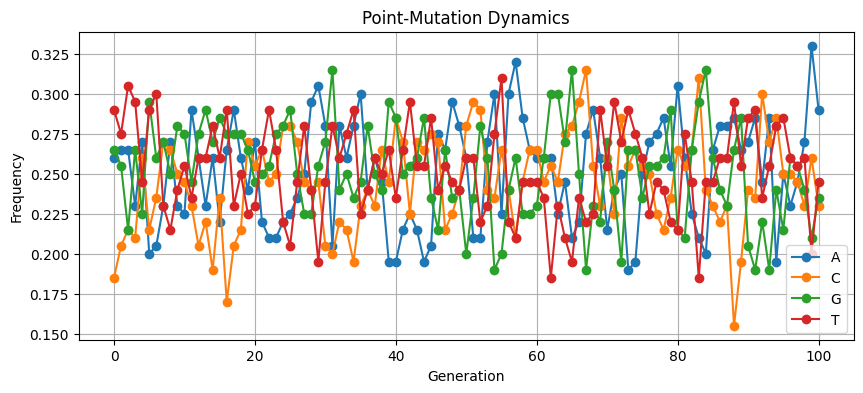

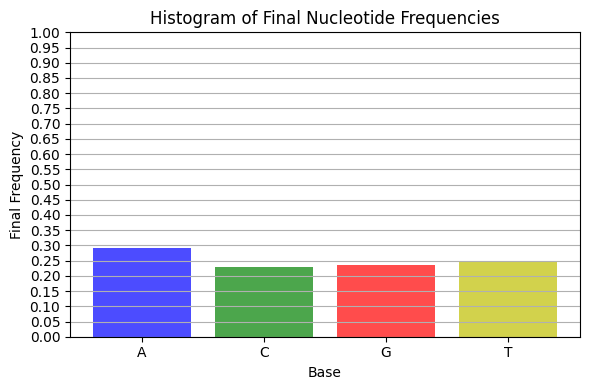

In [46]:
initial = ''.join(np.random.choice(list('ACGT'), size=200))
history = simulate_point_mutation_dynamics(initial, 0.50, 100)
plot_mutation_dynamics(history)

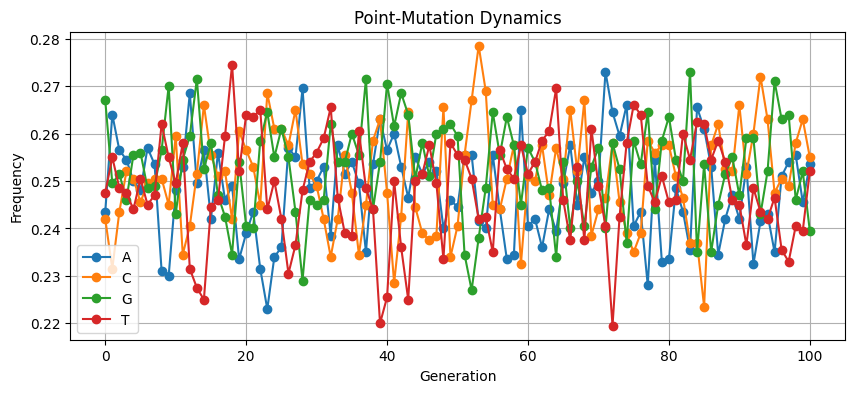

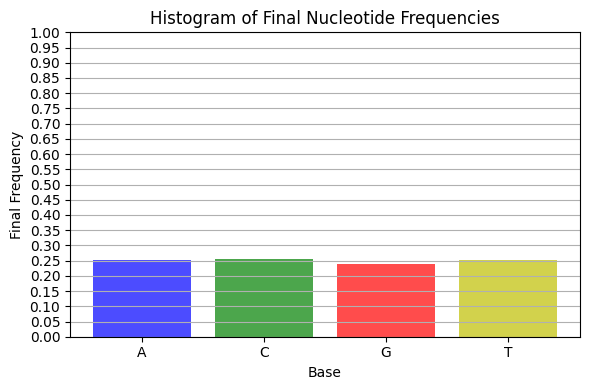

In [47]:
initial = ''.join(np.random.choice(list('ACGT'), size=2000))
history = simulate_point_mutation_dynamics(initial, 0.50, 100)
plot_mutation_dynamics(history)

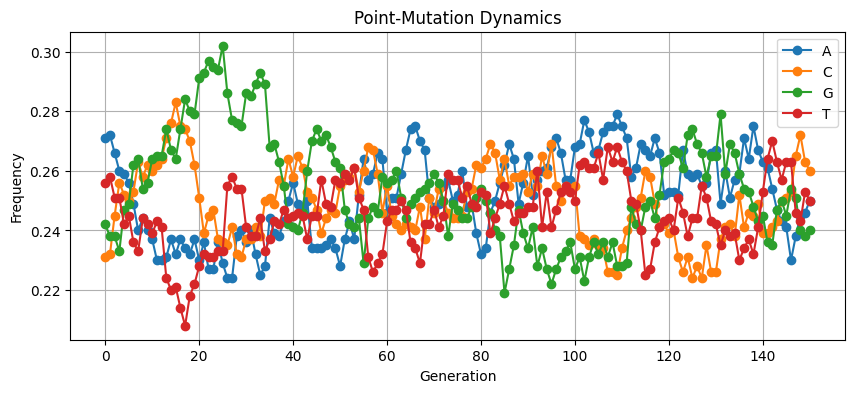

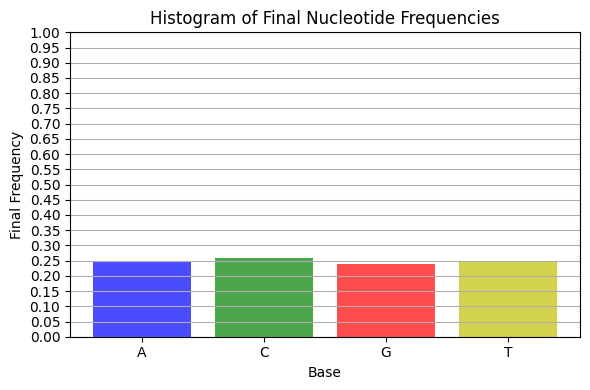

In [48]:
initial = ''.join(np.random.choice(list('ACGT'), size=1000))
history = simulate_point_mutation_dynamics(initial, 0.10, 150)
plot_mutation_dynamics(history)

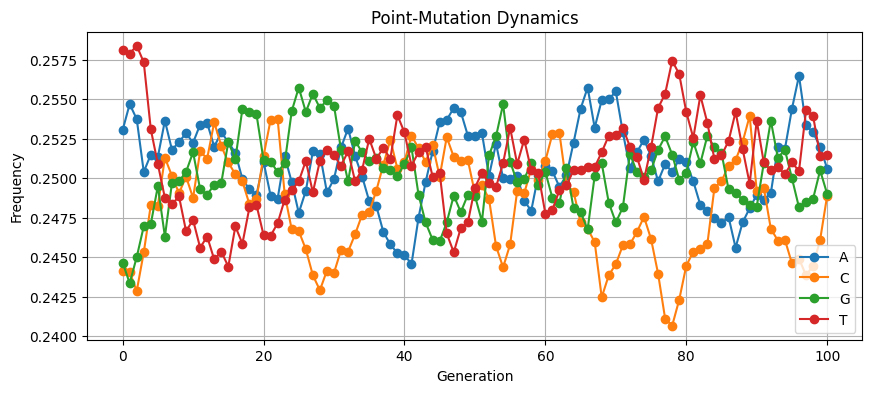

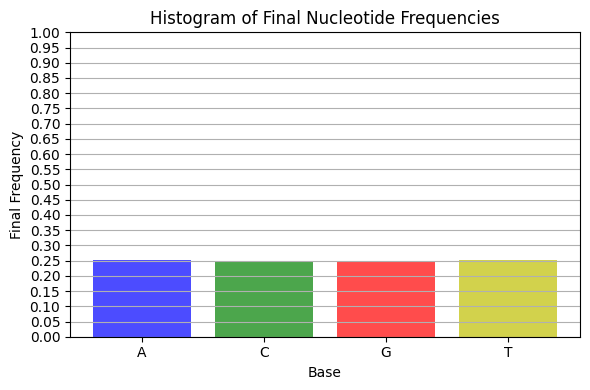

In [49]:
initial = ''.join(np.random.choice(list('ACGT'), size=20000))
history = simulate_point_mutation_dynamics(initial, 0.10, 100)
plot_mutation_dynamics(history)

In [50]:
#initial = ''.join(np.random.choice(list('ACGT'), size=200000))
#history = simulate_point_mutation_dynamics(initial, 0.20, 100)
#plot_mutation_dynamics(history)

In [51]:
#initial = ''.join(np.random.choice(list('ACGT'), size=100000))
#history = simulate_point_mutation_dynamics(initial, 0.90, 100)
#plot_mutation_dynamics(history)

<p style="font-size:18px;"> In our model, each nucleotide has the same probability $\mu$ of being selected for mutation per generation. Once chosen, it has a 50% chance to undergo a transition (purine - purine or pyrimidine - pyrimidine) and a 50% chance to undergo a transversion (purine - pyrimidine). This exactly matches the Jukes–Cantor (1969) model (JC69), the simplest DNA‐substitution scheme, in which all possible substitutions occur at the same rate and base frequencies are assumed uniform (with the same probability) at ($\frac{1}{4}$, $\frac{1}{4}$, $\frac{1}{4}$, $\frac{1}{4}$) - the only preferable composition here is the uniform distribution [0.25,0.25,0.25,0.25]. Changing the mutation probability $\mu$ (from very small to near 1) affects only the rate at which frequencies go towards this equilibrium— $\mu$ does not alter the eventual 25% share of A, C, G, and T. </p>

<p style="font-size:18px;"> Now we will reach the same conclusion using the Jukes-Cantor (JC69) Matrix (like the stochastic matrix we talked about): </p>

$$ Q = \begin{bmatrix}
1 - \mu & \frac{\mu}{3} & \frac{\mu}{3} & \frac{\mu}{3}  \\
\frac{\mu}{3} & 1 - \mu & \frac{\mu}{3} & \frac{\mu}{3} \\
\frac{\mu}{3} & \frac{\mu}{3} & 1 - \mu & \frac{\mu}{3} \\
\frac{\mu}{3} & \frac{\mu}{3} & \frac{\mu}{3} & 1 - \mu
\end{bmatrix}
$$

1) $\frac{\mu}{3}$ ensure exactly $\mu$ total chance to mutate away, split equally among three targets

2) $1 - \mu$ capture the "no change" probability

3) The order of probabilities of each base goes: A, C, G, T (or U)

In [52]:
def mutate_via_matrix(DNA_sequence, Q):
    """
    Given a DNA string and a 4x4 substitution matrix Q, independently mutate each base
    by sampling from the row of Q corresponding to its current base.
    """
    
    mapping = {'A':0, 'C':1, 'G':2, 'T':3}
    bases = ['A','C','G','T']

    # Convert DNA into numbers
    encoded_DNA = encode_dna_or_rna(DNA_sequence, mapping)

    # For each number, find the probability row from the matrix and generate new number
    mutated_DNA = np.array([np.random.choice(4, p=Q[base]) for base in encoded_DNA])

    # Convert mutated DNA array of numbers into a DNA sequence
    return ''.join(bases[base] for base in mutated_DNA)

In [53]:
def simulate_matrix_mutations(DNA_sequence, Q, generations):
    """
    Simulate point mutations under the matrix Q for a given  number of generations.
    """
    
    frequencies_history = []

    # Work with a local copy
    sequence = DNA_sequence 
    
    for generation in range(generations + 1):
        frequencies_history.append(nucleotide_frequencies(sequence))
        sequence = mutate_via_matrix(sequence, Q)
    
    return frequencies_history

In [54]:
#initial = ''.join(np.random.choice(list('ACGT'), size=100000))

mu = 0.10

Q  = np.full((4,4), mu / 3.0)
np.fill_diagonal(Q, 1 - mu)

#history = simulate_matrix_mutations(initial, Q, 100)
#plot_mutation_dynamics(history)

In [55]:
def plot_the_two_histories(history_flip, history_matrix):
    """
    Function to plot the ways of applying point mutations on the same graph
    (so we can prove that the two ways work the same)
    """
    
    num_gens = len(history_flip)
    bases    = 'ACGT'
    colors   = ['b','g','r','y']
    
    plt.figure(figsize=(12,12))
    
    for base, col in zip(bases, colors):
        flip_vals = [h[base] for h in history_flip]
        mat_vals  = [h[base] for h in history_matrix]
        plt.plot(range(num_gens), flip_vals,
                 linestyle='-', marker='o', color=col,
                 label=f'{base} (flip)')
        plt.plot(range(num_gens), mat_vals,
                 linestyle='--', marker='s', color=col,
                 label=f'{base} (matrix)')
        
    plt.xlabel('Generation')
    plt.ylabel('Frequency')
    plt.title('Flip vs. Matrix Mutation Dynamics')
    plt.legend(ncol=2, fontsize='small')
    plt.grid(True)
    plt.show()
    
    final_flip = history_flip[-1]
    final_mat  = history_matrix[-1]
    x = np.arange(len(bases))
    width = 0.4
    
    plt.bar(x - width/2,
            [final_flip[b] for b in bases],
            width, alpha=0.6, color='C0', label='Flip')
   
    plt.bar(x + width/2,
            [final_mat[b] for b in bases],
            width, alpha=0.9, color='C1', label='Matrix')
    
    y_ticks = np.arange(0, 1.01, 0.05)     
    plt.yticks(y_ticks, [f"{t:.2f}" for t in y_ticks])
    
    plt.xticks(x, list(bases))
    plt.ylim(0, 1)
    plt.xlabel('Base')
    plt.ylabel('Final Frequency')
    plt.title('Flip vs. Matrix Mutation Histograms')
    plt.legend()
    plt.grid(axis='y')

    plt.tight_layout()
    plt.show()

In [56]:
initial = ''.join(np.random.choice(list('ACGT'), size=100000))
mu = 0.30
generations = 100
Q  = np.full((4,4), mu / 3.0)
np.fill_diagonal(Q, 1 - mu)

#history_flip = simulate_point_mutation_dynamics(initial, mu, generations)
#history_matrix = simulate_matrix_mutations(initial, Q, 100)

#plot_the_two_histories(history_flip, history_matrix)

<p style="font-size:18px;"> We proved that no matter which way of representation we choose, the result is the same! </p>

### 2.6. Insertion Mutations

<p style="font-size:18px;"> An insertion at position $i$ means that one or more new bases are added immediately before - or between - the original sequence positions. We can represent this by a Boolean insertion mask: </p>

$$ \iota=(\iota_1, \iota_2, \dots, \iota_n), \iota_j \in \set{0,1} $$

<p style="font-size:18px;"> where $\iota_j = 1$ signals "insert here". </p>

### 2.7. Deletion Mutations

<p style="font-size:18px;"> A deletion removes existing bases. Analogous to insertions, we define a Boolean deletion mask: </p>

$$ \delta=(\delta_1, \delta_2, \dots, \delta_n), \delta_j \in \set{0,1} $$

<p style="font-size:18px;"> where $\delta_j = 1$ signals "delete base $j$". </p>

### 2.8. Frameshifts

<p style="font-size:18px;"> A frameshift mutation occurs when insertions or deletions (indels) change the length of a coding sequence by a number of nucleotides that is not a multiple of three. Since codons are triplets, such an indel shifts the reading "frame" for every downstream codon. We need to sum the net indel count (inserted bases - deleted bases):  </p>

$$ \Delta = \sum_{j=1}^{n} \iota_j - \sum_{j=1}^{n} \delta_j $$

<p style="font-size:18px;"> A frameshift would happen if: </p>

$$ \Delta \mod 3 \neq 0 $$

<p style="font-size:18px;"> Else, a mutation wouldn't have happened or an in-frame mutation happened </p>

## 3. Mutation as a Random Process

### 3.1. Core Probability Concepts

####  Sample space, event, probability

<p style="font-size:18px;"> In probability theory, there are certain concepts we need to be aware of. Starting with the sample space - the sample space $S$ of a random experiment is the set of all possible outcomes that can occur under identical conditions. For instance, when tossing a fair coin once, $ S = \set{Heads,Tails} $ since those are the only two results that can occur. An event $E$ is any subset of the sample space $S$, it "occurs" if the actual outcome lies in $E$. For instance, when rolling a six‐sided die, the event "roll is even" corresponds to $E = \set{2,4,6}$ within the sample space $\set{1,2,3,4,5,6}$. </p>

<p style="font-size:18px;"> The likelihood of an event $E$ is quantified by the probability $P(E)$ satisfying: </p>

$$ 0 \le P(E) \le 1 $$

<p style="font-size:18px;"> Zero indicates impossibility and one - certainty. When all outcomes of an experiment are equally likely, the probability of an event is simply: </p>

$$ P(E) = \frac{|E|}{|S|} $$

#### Theoretical and Empirical probability

<p style="font-size:18px;"> $S$ meaning the size of the set of all possible outcomes and $E$ is the set of favourable outcomes. Theoretical probability (also called classical probability) is the probability computed by reasoning about all possible equally likely outcomes, without performing any experiments. It is computed by the formula above. Empirical probability (also called experimental probability) is the probability of an event estimated by actually carrying out experiments and observing the fraction of times the event occurs. If we perform $n$ trials of an experiment and observe the event $E$ occur $k$ times, then: </p>

$$ P_{empirical}(E) = \frac{k}{n} $$

<p style="font-size:18px;"> In our context, each element (base) in a DNA sequence is an "experiment" whose outcomes (mutation or no mutation) will be modeled by these basic rules. </p>

#### Random variable (discrete and continue) & Probability (mass and density) functions

<p style="font-size:18px;"> A random variable is a function that assigns a numerical value to each outcome of a random experiment. Formally, if $\Omega$ is the sample space of all possible outcomes, then a random variable $X$ is a mapping $ X: \Omega \rightarrow \mathbb{R} $ that is measurable. A discrete random variable can take on only a finite or countable set of values - typically integers - each with a nonzero probability. For instance, the number of heads in three coin flips is discrete, assuming values in $\set{0,1,2,3}$. It is described with a probability mass function (PMF). On the other hand, a continuous random variable can assume any value in an interval of real numbers, such as the exact height of a person, and is described by a probability density function (PDF) rather than a PMF. </p>

<p style="font-size:18px;"> The probability mass function (PMF) of a discrete random variable $X$ is the function: </p>

$$ p_X(x) = P(X=x), $$

<p style="font-size:18px;"> assigning each possible value $x$ the probability that $X$ equals $x$. The PMF must satisfy: </p>

$$ p_X(x) \ge 0 \quad  \text{and} \quad \sum_x{p_x(x)} = 1 $$

<p style="font-size:18px;"> For instance, if $X$ counts heads in two fair coin flips, then $p_X(0) = \frac{1}{4} $, $p_X(1) = \frac{1}{2}$, and $p_X(2) = \frac{1}{4}$.

In [57]:
def demo_probability_terms(event, n_rolls):
    """
    Function to demonstrate basic probability terms - sample space and event for rolling a fair die,
    theoretical probability of rolling a number and empirical probability.
    """
    
    # Possible outcomes of rolling a die (1-6) 
    sample_space = np.arange(1, 7)
    
    p_theoretical = 1 / len(sample_space)
    
    rolls = np.random.choice(sample_space, size=n_rolls)
    p_empirical = np.mean(rolls == event)
    
    print(f"Theoretical P(roll = {event}): {p_theoretical:.8f}")
    print(f"Empirical P(roll = {event}): {p_empirical:.8f}")

    counts = [np.sum(rolls == face) for face in sample_space]
    
    plt.figure(figsize=(6, 4))
    
    bars = plt.bar(
        sample_space, counts,
        color='skyblue', edgecolor='black', width=0.6, alpha=0.8
    )

    plt.xlabel("Die face")
    plt.ylabel("Count")

    ymax = max(counts) * 1.10
    plt.ylim(0, ymax)
    plt.title(f"Empirical Frequencies of Die Rolls ({n_rolls} trials)")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Theoretical P(roll = 3): 0.16666667
Empirical P(roll = 3): 0.16700000


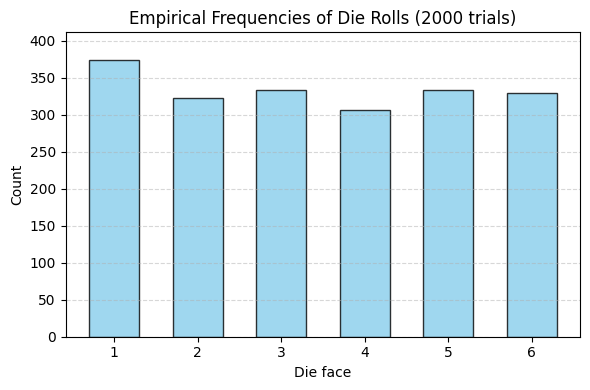

In [58]:
demo_probability_terms(3, 2000)

Theoretical P(roll = 3): 0.16666667
Empirical P(roll = 3): 0.16780000


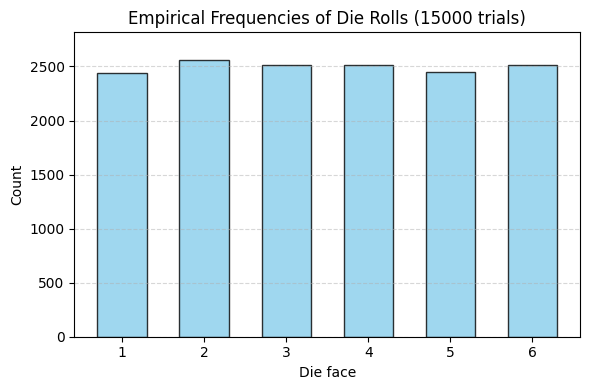

In [59]:
demo_probability_terms(3, 15000)

Theoretical P(roll = 3): 0.16666667
Empirical P(roll = 3): 0.16503000


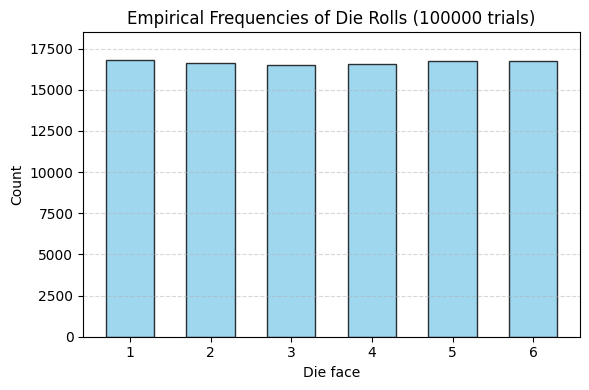

In [60]:
demo_probability_terms(3, 100000)

Theoretical P(roll = 3): 0.16666667
Empirical P(roll = 3): 0.16637400


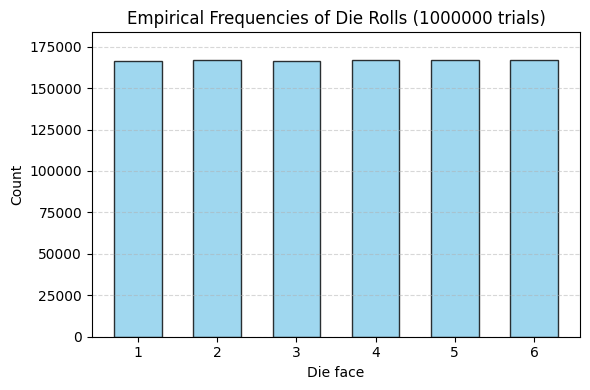

In [61]:
demo_probability_terms(3, 1000000)

Theoretical P(roll = 3): 0.16666667
Empirical P(roll = 3): 0.16677630


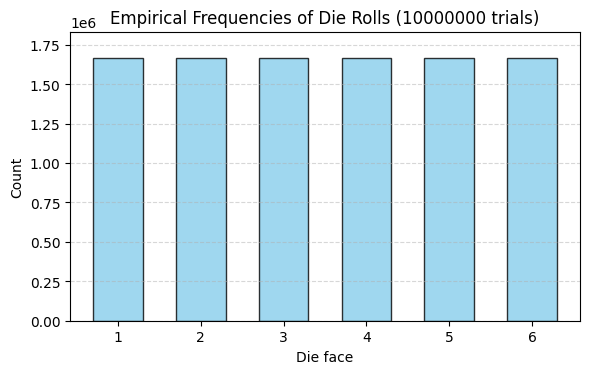

In [62]:
demo_probability_terms(3, 10000000)

<p style="font-size:18px;"> Again, we can conclude that as the number of trials grows without bound, the observed frequency of any event will almost surely converge to its true (theoretical) probability. In other words, if we repeatedly roll a fair die or simulate millions of independent mutation‐or‐no‐mutation experiments, the proportion of times we see a given outcome will settle ever closer to the exact probability we have computed. This fundamental result - the Law of Large Numbers - underpins the entire practice of using simulations to validate probabilistic models: by running enough trials, we can be confident that our empirical estimates truly reflect the underlying theoretical probabilities. </p>

### 3.2. Bernoulli Trials and Bernoulli Distribution for Mutations

<p style="font-size:18px;"> A Bernoulli trial is a random experiment with exactly two outcomes - labeled "success" and "failure" - where the probability of success $p$ remains constant across trials. Named after Jacob Bernoulli, a 17th-century Swiss mathematician, these trials form the basis of many models in probability and statistics.</p>

<p style="font-size:18px;"> If $X$ denotes the outcome of a Bernoulli trial, then: </p>

$$ X = \begin{cases}
1, & \text{with probability } \quad p \\
0, & \text{with probability } \quad q = 1 - p
\end{cases} $$

<p style="font-size:18px;"> When a random variable $X$ arises from a single Bernoulli trial, it is said to follow the Bernoulli distribution, denoted $ X \sim Bernoulli(p) $. The PMF is: </p>

$$ P(X = k) =  \begin{cases}
p, \quad k = 1 \\
1 - p, \quad k = 0 \\
0, \quad \text{otherwise}
\end{cases} $$

<p style="font-size:18px;"> Equivalently, we can write: </p>

$$ P(X = k) = p^k(1 - p)^{1 - k}, k \in \set{0, 1} $$

<p style="font-size:18px;"> In our mutation model, each nucleotide position $j$ is one such trial - success ($X_j = 1$) means the base mutates, with probability $\mu$, failure ($X_j = 0$) means the base remains unchanged, with probability $1 - \mu$.

In [63]:
def bernoulli_mutations(mu, n_trials):
    """
    Function to simulate Bernoulli trials for mutation (1) vs no mutation (0).
    """
    
    samples = np.random.rand(n_trials) < mu
    
    counts = np.bincount(samples, minlength=2)
    
    plt.figure(figsize=(6, 4))
    plt.bar([0, 1], counts, color=['gray', 'blue'], alpha=0.7, edgecolor='black')
    plt.xticks([0, 1], ['No Mutation (0)', 'Mutation (1)'])
    plt.ylabel('Count')
    plt.title(f'Bernoulli Trials (μ={mu}, n={n_trials})')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

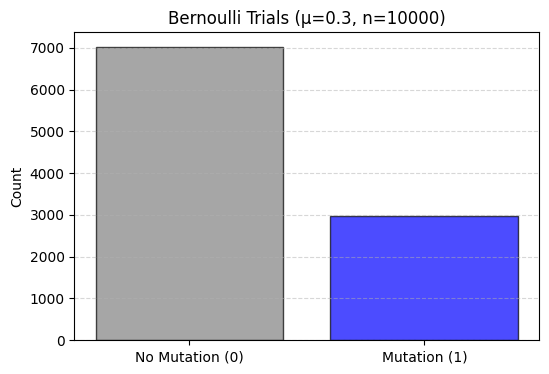

In [64]:
bernoulli_mutations(0.3, 10000)

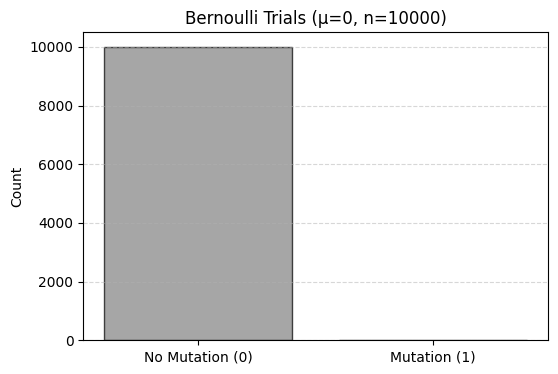

In [65]:
bernoulli_mutations(0, 10000)

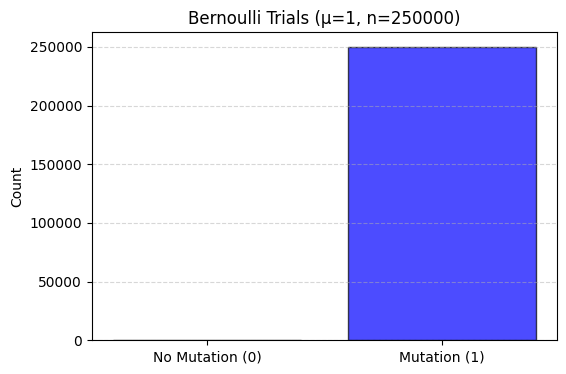

In [66]:
bernoulli_mutations(1, 250000)

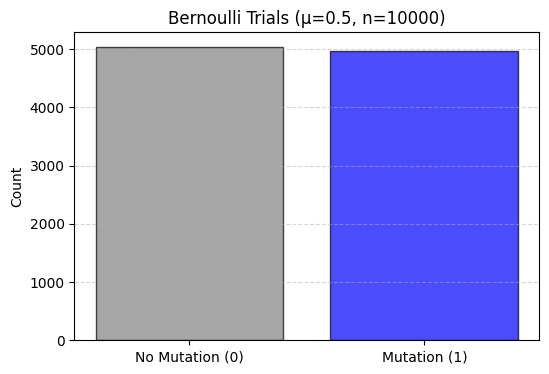

In [67]:
bernoulli_mutations(0.5, 10000)

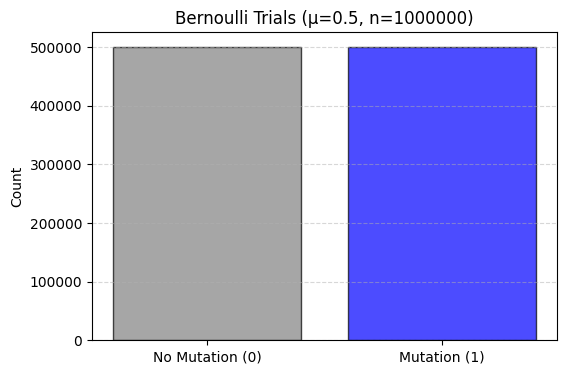

In [68]:
bernoulli_mutations(0.5, 1000000)

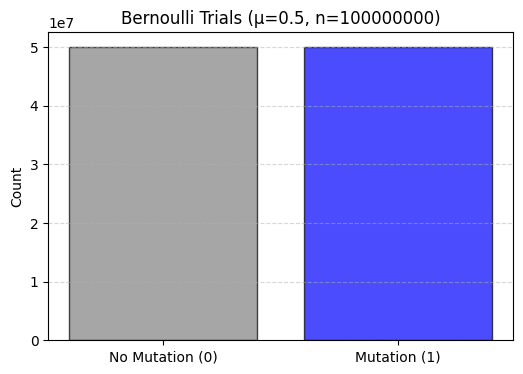

In [69]:
bernoulli_mutations(0.5, 100000000)

### 3.3. Binomial Distribution for Total Mutations

<p style="font-size:18px;"> After modeling each element's mutation as a Bernoulli trial, we next consider the total number of mutated sites in a genome of length $n$. If: </p>

$$ X_j \sim Bernoulli(x) \quad (j = 1, \dots, n) $$

<p style="font-size:18px;"> are independent, then the sum: </p>

$$ K =  \sum_{j = 1}^{n}{X_j} $$

<p style="font-size:18px;"> follows the Binomial distribution: </p>

$$ K =  \sum_{j = 1}^{n}{X_j} \sim Binomial(n, \mu) $$

<p style="font-size:18px;"> Its probability mass function is: </p>

$$ P(K = k) = \binom{n}{k}\mu^k(1 - \mu)^{n - k}, \quad k = 0, 1, \dots, n $$,
$ \binom{n}{k} $ counts the number of ways to choose which $k$ bases mutate. 

<p style="font-size:18px;"> Unlike Bernoulli distribution, which models a single yes-no experiment with one parameter $p$, the Binomial distribution describes the count of successes across $n$ independent Bernoulli trials and therefore requires two parameters ($n$, $p$ (or $\mu$)). The Bernoulli trial's random variable $X$ takes values only 0 or 1, whereas the Binomial random variable $K$ can assume any integer from 0 up to $n$, reflecting the total number of "successes" in $n$ trials. The Binomial formula aggregates the individual trial probabilities over multiple experiments. We adopt the Binomial distribution for our total mutations because it directly models "how many bases mutate" in a genome of length $n$ when each base independently mutates with probability $μ$. </p> 

In [70]:
def binomial_distribution(n, mu, n_sims):
    """
    Function to compare theoretical Binomial(n, mu) PMF to simulated mutation counts.
    """
    
    k = np.arange(n + 1)
    pmf = binom.pmf(k, n, mu)
    samples = np.random.binomial(n, mu, size=n_sims)

    plt.figure(figsize=(8, 4))
    plt.plot(k, pmf, 'o-', label='Theoretical PMF', color="red")
    plt.hist(samples, bins=np.arange(-0.5, n+1.5), density=True,
             alpha=0.5, label='Simulated', color='blue')
    
    plt.xlabel('Total Mutations (k)')
    plt.ylabel('Probability')
    plt.title(f'Binomial Distribution (n={n}, μ={mu})')
    plt.legend()
    plt.grid(True)
    plt.show()

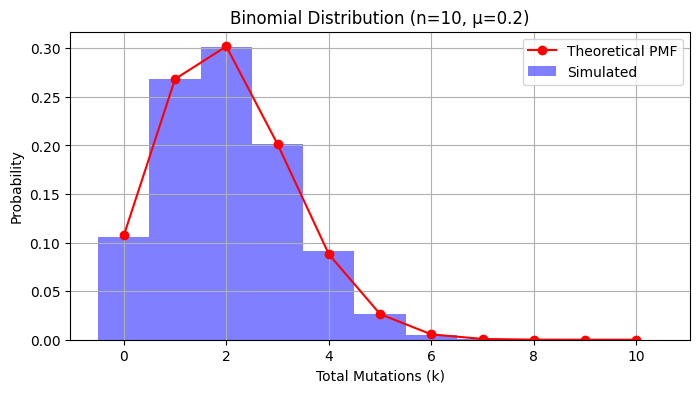

In [71]:
binomial_distribution(10, 0.2, 10000)

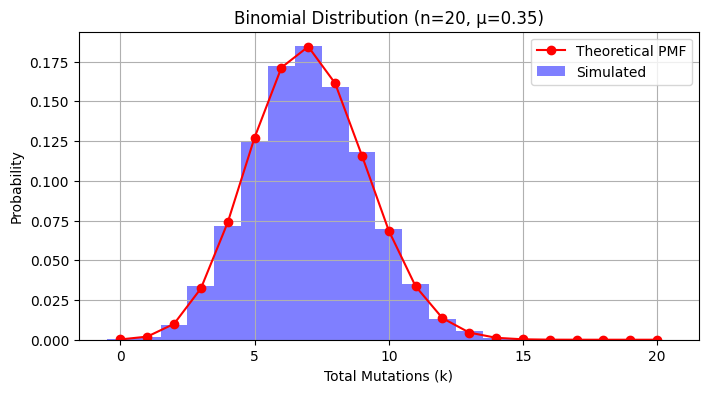

In [72]:
binomial_distribution(20, 0.35, 20000)

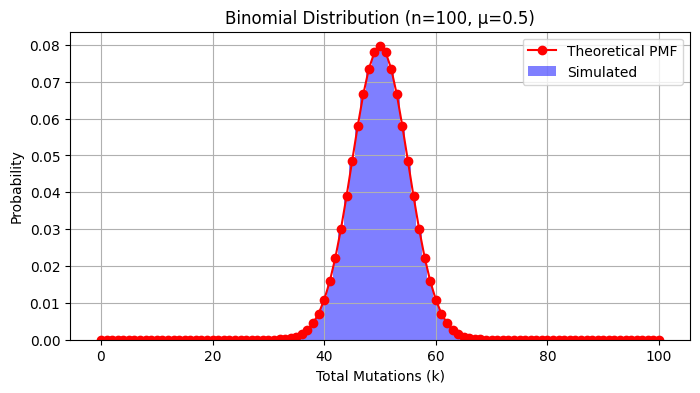

In [73]:
binomial_distribution(100, 0.5, 100000000)

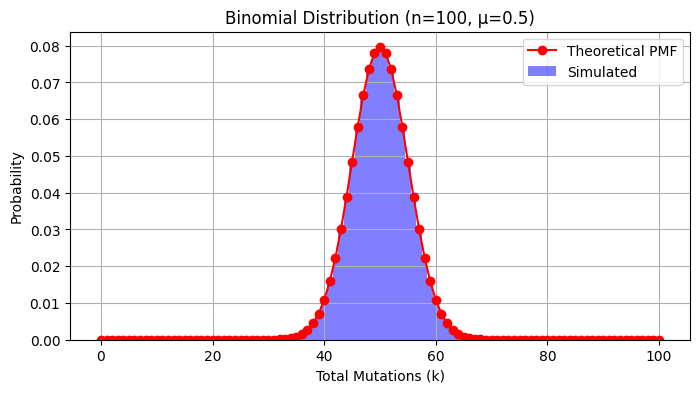

In [74]:
binomial_distribution(100, 0.5, 1000000)

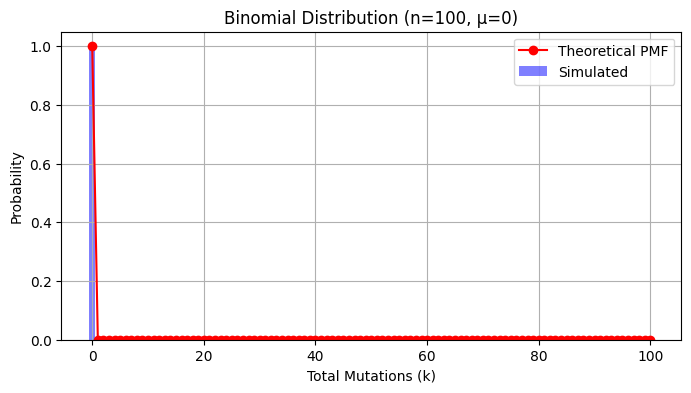

In [75]:
binomial_distribution(100, 0, 1000000)

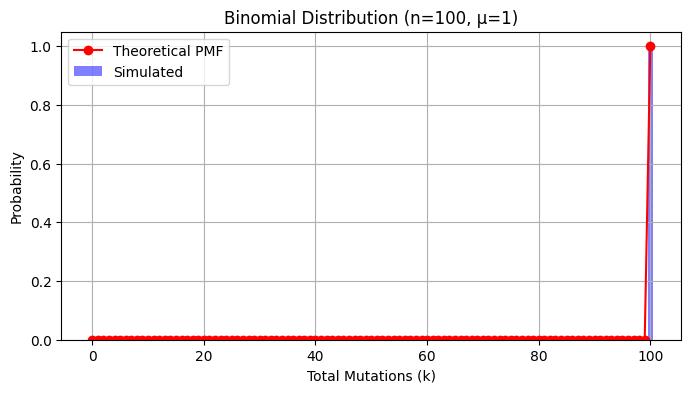

In [76]:
binomial_distribution(100, 1, 1000000)

### 3.4. Categorical Distribution for Mutation Types

<p style="font-size:18px;"> Once a nucleotide site is chosen to mutate (a "success" in our Bernoulli trial), we must decide which substitution occurs. We know that mutations split into 2 classes - transitions (purine <-> purine or pyrimidine <-> pyrimidine) and transversions (purine <-> pyrimidine). We model this choice with a Categorical distribution, the generalization of the Bernoulli to $K$ ($\gt 2$) outcomes. Here $K = 2$, because of the categories (transitions, transversions). Let the random variable $Y_j$ denote the mutation type at base $j$. Then: </p>

$$ Y_j \sim Categorical(p_{tr}, 1 - p_{tr}), $$

$$ p_{tr} = P(Y_j = transition), $$

$$ 1 - p_{tr} = P(Y_j = transversion), $$

<p style="font-size:18px;"> The PMF is: </p>

$$ P(Y_j = i) =  \begin{cases}
p_{tr}, \quad i = transition \\
1 - p_{tr}, \quad i = transversion \\
0, \quad \text{otherwise}
\end{cases} $$

In [77]:
def categorical_distribution_for_mutation_types(p_transition, bases):
    """
    Function to simulate and plot the Categorical distribution for mutation types.
    """
    
    draws = np.random.rand(bases)
    is_transition = (draws < p_transition)
    
    counts = np.bincount(is_transition, minlength=2)
    freqs = counts / bases
    
    plt.figure(figsize=(6, 4))
    bars = plt.bar(
        ['Transversion', 'Transition'],
        freqs,
        color=['orange', 'green'],
        alpha=0.8,
        edgecolor='black'
    )
    
    for bar, freq in zip(bars, freqs):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            freq + 0.01,
            f"{freq:.5f}",
            ha='center'
        )
    
    plt.ylabel('Empirical Frequency')
    plt.title(f'Categorical Distribution (p_transition={p_transition}, n={bases})')
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

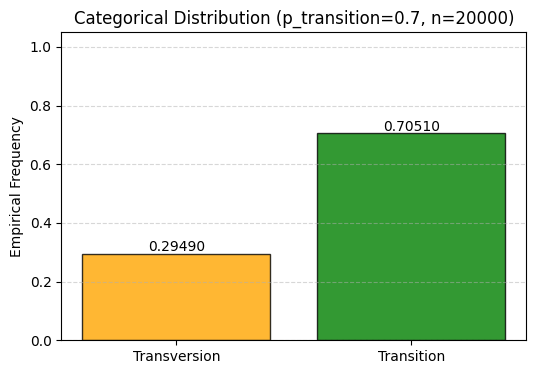

In [78]:
categorical_distribution_for_mutation_types(0.7, 20000)

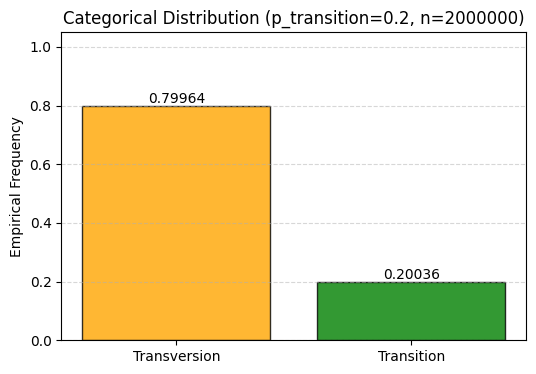

In [79]:
categorical_distribution_for_mutation_types(0.2, 2000000)

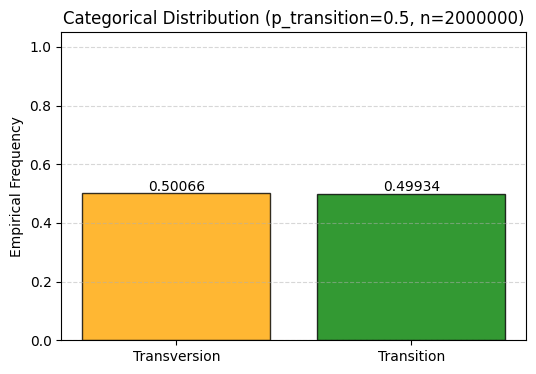

In [80]:
categorical_distribution_for_mutation_types(0.5, 2000000)

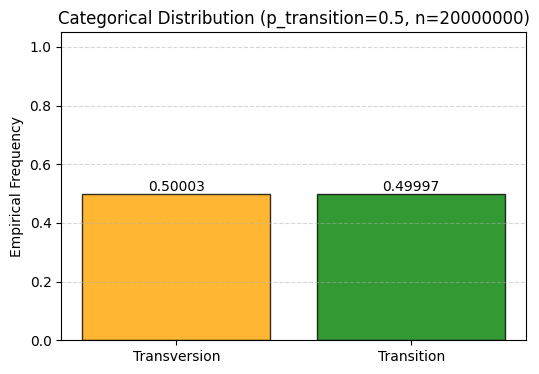

In [81]:
categorical_distribution_for_mutation_types(0.5, 20000000)

## 4. Markov Chains and Modelling DNA Mutations

### 4.1. Stochastic Processes

<p style="font-size:18px;"> A stochastic process is any collection of random variables $\set{Xt}$ indexed by time $t$, which describes how some quantity evolves under randomness. Simply, we observe a variable that "jumps" or "drifts" according to chance at each time step. Stochastic processes encompass a wide variety of models - random walks, Poisson processes, and Markov chains and Bernoulli processes - and find applications across mathematics, engineering, computer science, biology, and finance. They can be classified by whether time $t$ takes values in a discrete set (leading to discrete‐time processes) or a continuum (continuous‐time processes). </p>

![Stochastic Processes](../images/Stochastic.jpg)

### 4.2. Markov Chains

<p style="font-size:18px;"> Named after Andrey Markov, a Markov chain is a special kind of discrete‐time stochastic process with the memoryless (Markov) property: the probability of transitioning to the next state depends only on the current state, not on the full history. Formally, if $\set{Xt}$ takes values in a finite set $S$, then for any $t$ and any $ i,j \in S:$

$$ Pr(X_{t+1} = j \mid X_t = i, X_{t−1}, \dots) = Pr(X_{t+1} = j \mid X_t = i) $$

<p style="font-size:18px;"> A classic non‐Markov example is drawing balls without replacement: the probability of drawing a red ball on the next draw depends on which and how many balls have already been removed. But if we replace each ball before drawing again, the process becomes Markovian - each draw's color probability depends only on the current elements in the bag. </p>

![Markov Chain](../images/MarkovChain.jpg)

In [82]:
def one_step_markov(initial_dist, mu):
    """
    Function to apply one step of the Jukes-Cantor Markov mutation process.
    """

    P = np.full((4, 4), mu / 3)
    np.fill_diagonal(P, 1 - mu)
    v0 = np.array(initial_dist)
    return v0 @ P

In [83]:
v0 = [0.4, 0.3, 0.2, 0.1]
result = one_step_markov(v0, 0.3)
print("After one mutation step:", result)

After one mutation step: [0.34 0.28 0.22 0.16]


In [84]:
v0 = [1, 0, 0, 0]
result = one_step_markov(v0, 0.5)
print("After one mutation step:", result)

After one mutation step: [0.5        0.16666667 0.16666667 0.16666667]


In [85]:
v0 = [0.25, 0.25, 0.25, 0.25]
result = one_step_markov(v0, 0.3)
print("After one mutation step:", result)
print("Output should stay the same or very close - this is the stationary distribution.")

After one mutation step: [0.25 0.25 0.25 0.25]
Output should stay the same or very close - this is the stationary distribution.


In [86]:
v0 = [0.03, 0.9, 0.04, 0.03]
result = one_step_markov(v0, 0.5)
print("After one mutation step:", result)

After one mutation step: [0.17666667 0.46666667 0.18       0.17666667]


In [87]:
v0 = [0, 0, 1, 0]
result = one_step_markov(v0, 0.5)
print("After one mutation step:", result)

After one mutation step: [0.16666667 0.16666667 0.5        0.16666667]


### 4.3. Discrete-Time Markov Chains and Transition Matrices

<p style="font-size:18px;"> A discrete-time Markov chain (DTMC) is fully specified by its state space $S$ (in our case, $\set{A,C,G,T}$) and a transition matrix $P$. There is a fixed order: $1, 2, \dots, N$ and the $N \times N$ matrix:

$$ P=(p_{ij}) \quad \text{where} \quad p_{ij} = Pr(X_{t+1} = j \mid X_t = i), $$

<p style="font-size:18px;"> The transition matrix $must$ satisfy:

$$ 0 \le p_{i,j} \le 1, \quad \sum_{j=1}^Np_{ij} = 1 \quad \text{for each i} $$

<p style="font-size:18px;"> Because each row sums to 1, $P$ is also called a stochastic matrix. If in addition each column sums to 1, $P$ is doubly stochastic. </p>

![Transition Matrix](../images/TransitionMatrix.jpg)

In [88]:
def generate_jc_matrix(mu):
    """
    Function to generate JC69 matrix with a desired mutation rate.
    """
    
    P = [[mu / 3] * 4 for _ in range(4)]
    
    for i in range(4):
        P[i][i] = 1 - mu
        
    return P

In [89]:
def validate_stochastic(P):
    """
    Function to validate if a given matrix is stochastic - each row must sum to 1 (with a tiny difference possible)
    """
    
    return all(abs(sum(row) - 1.0) < 1e-8 for row in P)

In [90]:
P = generate_jc_matrix(0.3)
print("Stochastic matrix:")
for row in P:
    print([round(val, 2) for val in row])

Stochastic matrix:
[0.7, 0.1, 0.1, 0.1]
[0.1, 0.7, 0.1, 0.1]
[0.1, 0.1, 0.7, 0.1]
[0.1, 0.1, 0.1, 0.7]


In [91]:
P = generate_jc_matrix(1)
print("Stochastic matrix:")
for row in P:
    print([round(val, 2) for val in row])

Stochastic matrix:
[0, 0.33, 0.33, 0.33]
[0.33, 0, 0.33, 0.33]
[0.33, 0.33, 0, 0.33]
[0.33, 0.33, 0.33, 0]


In [92]:
P = generate_jc_matrix(0)
print("Stochastic matrix:")
for row in P:
    print([round(val, 2) for val in row])

Stochastic matrix:
[1, 0.0, 0.0, 0.0]
[0.0, 1, 0.0, 0.0]
[0.0, 0.0, 1, 0.0]
[0.0, 0.0, 0.0, 1]


In [93]:
P = generate_jc_matrix(0.9)
print("Stochastic matrix:")
for row in P:
    print([round(val, 2) for val in row])

Stochastic matrix:
[0.1, 0.3, 0.3, 0.3]
[0.3, 0.1, 0.3, 0.3]
[0.3, 0.3, 0.1, 0.3]
[0.3, 0.3, 0.3, 0.1]


In [94]:
P = generate_jc_matrix(0.5)
print(f"Is matrix stochastic? - {validate_stochastic(P)}")

Is matrix stochastic? - True


In [95]:
P = generate_jc_matrix(1)
print(f"Is matrix stochastic? - {validate_stochastic(P)}")

Is matrix stochastic? - True


In [96]:
P = [[1, 1, 1, 1], 
     [1, 1, 1, 1], 
     [1, 1, 1, 1], 
     [1, 1, 1, 1]
]

print(f"Is matrix stochastic? - {validate_stochastic(P)}")

Is matrix stochastic? - False


### 4.4. Chain structure terms

<p style="font-size:18px;"> There are several different properties in a chain (in our case - Markov Chain). </p>

In [97]:
def draw_markov_graph(P, highlight_edges=[], title="", edge_color_map=None):
    """
    Function to visualize the Markov chain transition graph.
    """
    
    state_names = ['A', 'C', 'G', 'T']

    # We use a multigraph for multiple (2) directed edges between the same pair of nodes
    G = nx.MultiDiGraph()

    for i in range(4):
        G.add_node(state_names[i])
    for i in range(4):
        for j in range(4):
            if i != j:
                G.add_edge(state_names[i], state_names[j], weight=round(P[i][j], 2))

    # Create layout for graph
    pos = nx.circular_layout(G)
    plt.figure(figsize=(8, 6))

    # Add nodes along with their labels
    nx.draw_networkx_nodes(G, pos, node_color='burlywood', node_size=1000)
    nx.draw_networkx_labels(G, pos, font_size=16)

    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Draw each edge exactly once
    drawn_edges = set()
    for (u, v, key) in G.edges(keys=True):
        if (u, v) in drawn_edges:
            continue  
            
        drawn_edges.add((u, v))

        # Allows us to emphasize certain edges
        is_highlighted = (u, v) in highlight_edges
        edge_color = 'gray'
        edge_width = 1.5

        # If the edge is special
        if is_highlighted:
            edge_color = 'red'
            edge_width = 4.0

        # Gives the direction from node u to node v
        dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]

        # Normalize the vector (make it unit length) - th vector becomes of length 1
        norm = (dx ** 2 + dy ** 2) ** 0.5
        dx, dy = dx / norm, dy / norm

        # Gives a vector perpendicular to the edge (90° rotation)
        perp_dx, perp_dy = -dy, dx

        offset_scale = 0.1
        offset = 0  

        # The middle of the edge is the average of the coordinates,  move it slightly up/down
        control_x = (pos[u][0] + pos[v][0]) / 2 + offset_scale * offset * perp_dx
        control_y = (pos[u][1] + pos[v][1]) / 2 + offset_scale * offset * perp_dy

        # Draw arrows according to a style, color, width and distance from a node
        arrowprops = dict(arrowstyle='-|>', color=edge_color, lw=edge_width, shrinkA=15, shrinkB=15) 
        plt.annotate("",
                     xy=pos[v], xytext=pos[u],
                     arrowprops=arrowprops,
                     annotation_clip=False,
                     xycoords='data', textcoords='data')

        plt.text(control_x, control_y, str(G[u][v][key]['weight']),
                 fontsize=10, ha='center', va='center',
                 backgroundcolor='white', color='black')

    # Show self-transition probabilities on top of each node
    for i, name in enumerate(state_names):
        x, y = pos[name]
        plt.text(x, y + 0.10, round(P[i][i], 2), fontsize=11, ha='center', color='black')

    # Add a LaTeX-compatible title with offset
    plt.text(0.5, 1.05, title, fontsize=14,
         ha='center', va='bottom', transform=plt.gca().transAxes)
    
    plt.axis('off')
    plt.show()

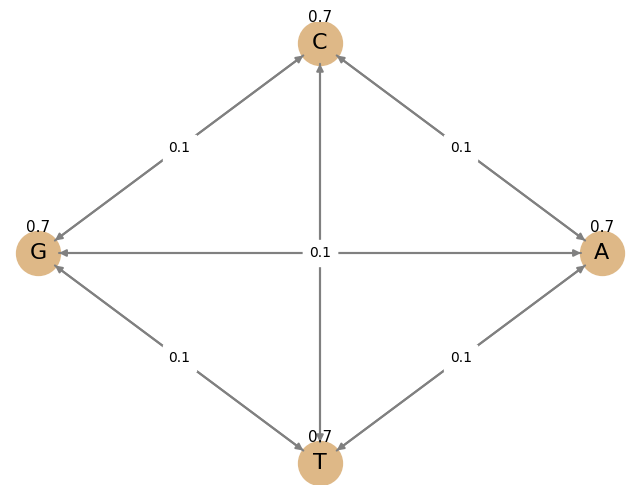

In [98]:
mu = 0.30
P = generate_jc_matrix(mu)
draw_markov_graph(P)

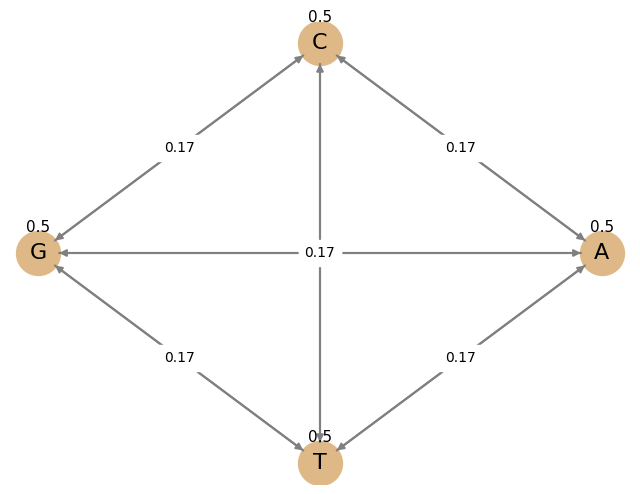

In [99]:
mu = 0.50
P = generate_jc_matrix(mu)
draw_markov_graph(P)

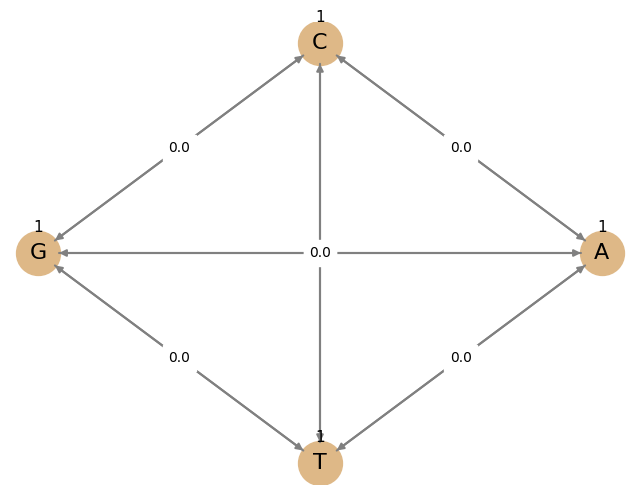

In [100]:
mu = 0
P = generate_jc_matrix(mu)
draw_markov_graph(P)

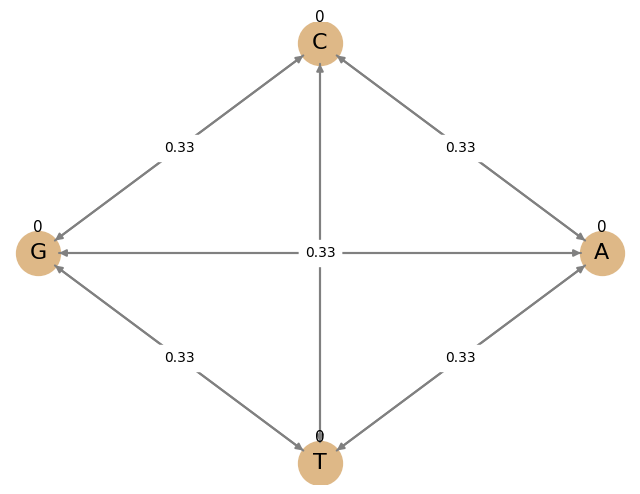

In [101]:
mu = 1
P = generate_jc_matrix(mu)
draw_markov_graph(P)

#### Accessibility
<p style="font-size:18px;"> For two states $i$ and $j$ we write $i \rightarrow j$ ("$j$ is accessible from $i$") when there exists at least one time step $n \ge 0$ such that the $n$-step transition probability is true: </p>

$$ p_{ij}^{(n)} = P(X_{t+n} = j \mid X_t = i) \gt 0 \quad \text{for some n} $$

<p style="font-size:18px;"> This means that starting in $i$, we have some non-zero chance of landing in $j$ after exactly $n$ jumps. If $ n = 0: p_{ii}^{(0)} = 1 $ by definition (every state is trivially accessible from itself). </p>

In [102]:
def plot_accessibility(P, from_index, to_index):
    """
    Function to highlight a single accessibility edge with bold red arrow.
    """
    
    state_names = ['A', 'C', 'G', 'T']
    
    e = (state_names[from_index], state_names[to_index])
    
    draw_markov_graph(P, highlight_edges=[e], title=rf"Accessibility: {e[0]} $\rightarrow$ {e[1]}")

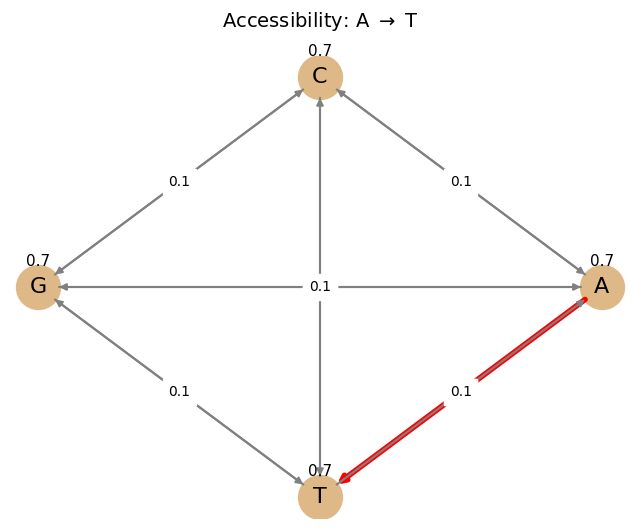

In [103]:
P = generate_jc_matrix(0.3)
plot_accessibility(P, 0, 3)  

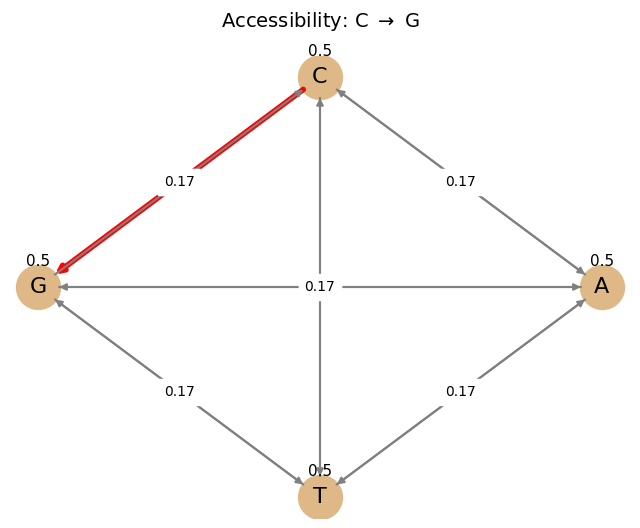

In [104]:
P = generate_jc_matrix(0.5)
plot_accessibility(P, 1, 2)  

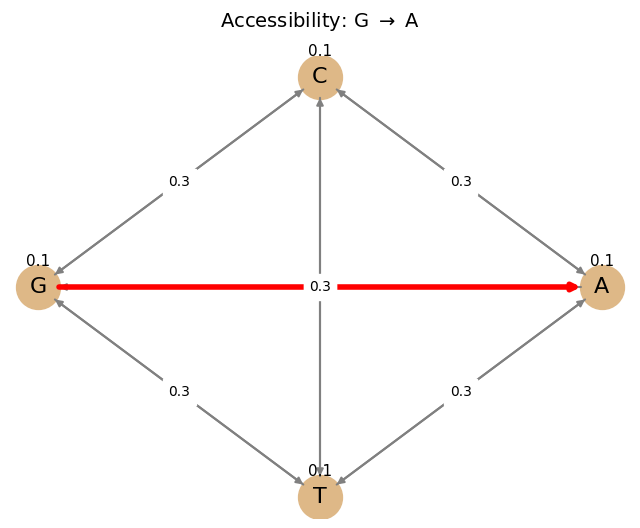

In [105]:
P = generate_jc_matrix(0.9)
plot_accessibility(P, 2, 0)  

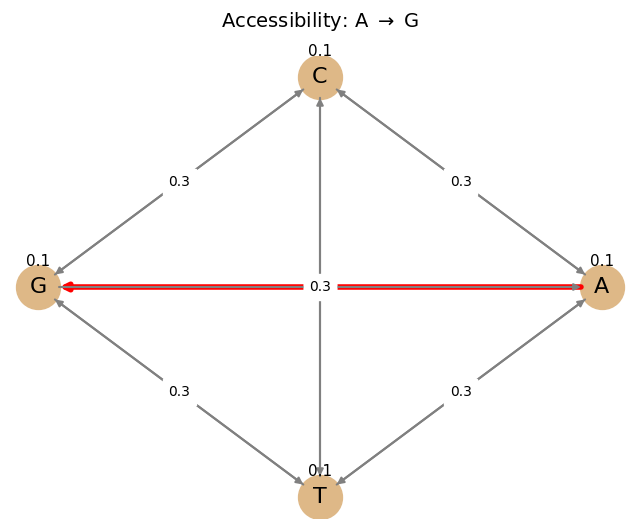

In [106]:
P = generate_jc_matrix(0.9)
plot_accessibility(P, 0, 2)  

#### Communication 

<p style="font-size:18px;"> Two states communicate ($i \leftrightarrow j$) if each one is accessible from the other: </p>

$$ i \leftrightarrow j \Leftrightarrow (i \rightarrow j) \land (j \rightarrow i) $$

<p style="font-size:18px;"> Because accessibility is reflexive, symmetric, and transitive, "communicates with" is an equivalence relation, which automatically divides the state space into communicating classes (collections of states). Only states inside the same class can reach one another, states in different classes never do. </p>

<p style="font-size:18px;"> In our model, communication appears identical to accessibility in the graph, because the chain is symmetric and all states can reach each other in one step. However, communication strictly means mutual reachability. </p>

In [107]:
def plot_communication(P, from_index, to_index):
    """
    Function to highlight the communication property with edges with bold red arrows.
    """
    
    state_names = ['A', 'C', 'G', 'T']
    
    e1 = (state_names[from_index], state_names[to_index])
    e2 = (state_names[to_index], state_names[from_index])
    
    draw_markov_graph(P, highlight_edges=[e1, e2], title=rf"Communication: {e1[0]} $\leftrightarrow$ {e1[1]}")

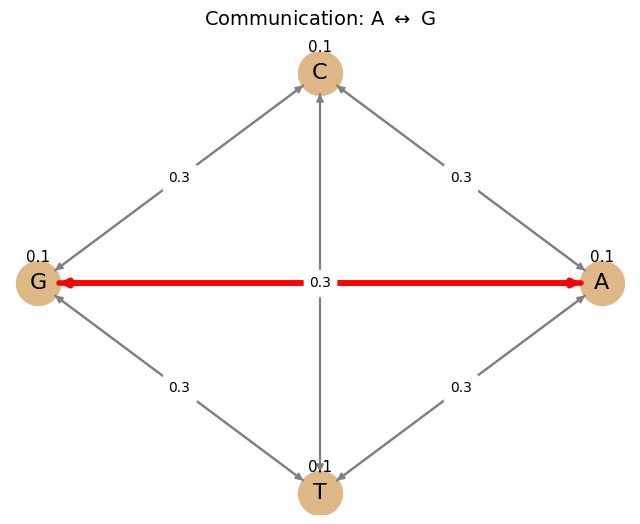

In [108]:
P = generate_jc_matrix(0.9)
plot_communication(P, 0, 2)  

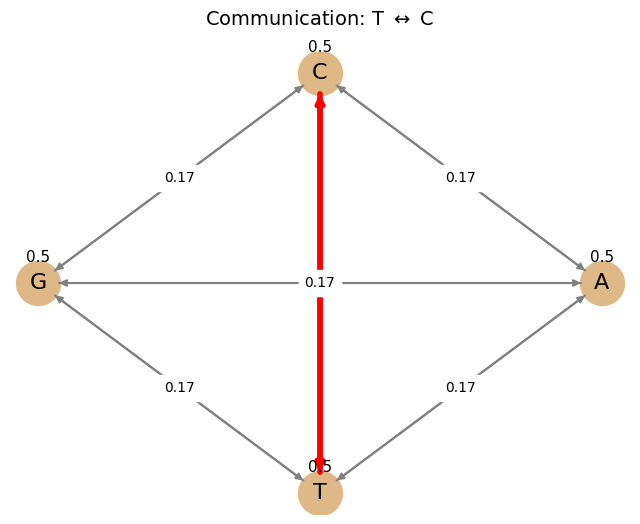

In [109]:
P = generate_jc_matrix(0.5)
plot_communication(P, 3, 1)  

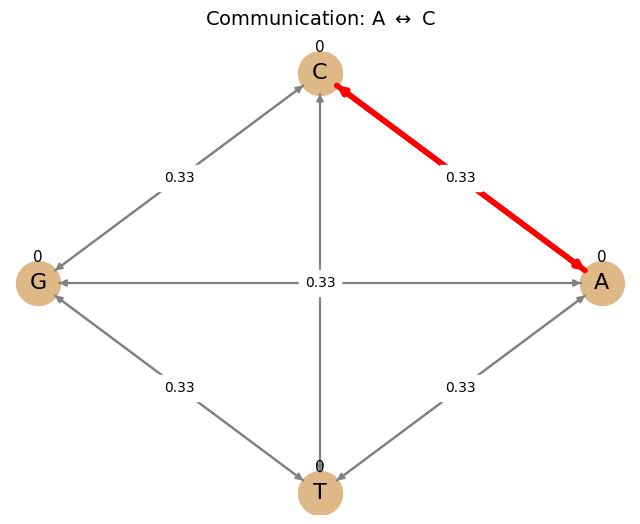

In [110]:
P = generate_jc_matrix(1)
plot_communication(P, 0, 1)  

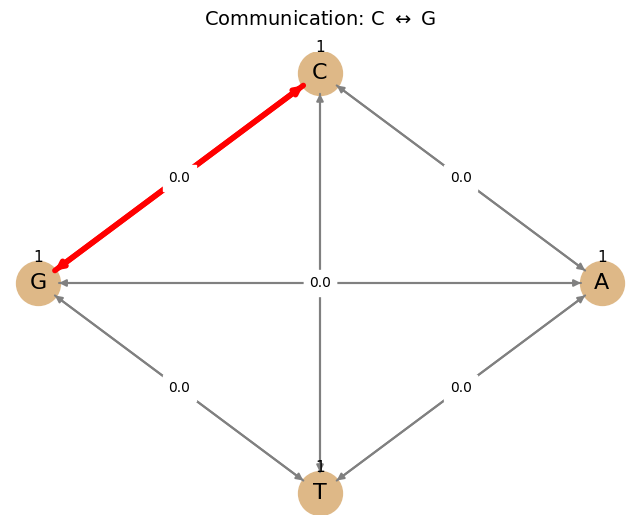

In [111]:
P = generate_jc_matrix(0)
plot_communication(P, 1, 2)  

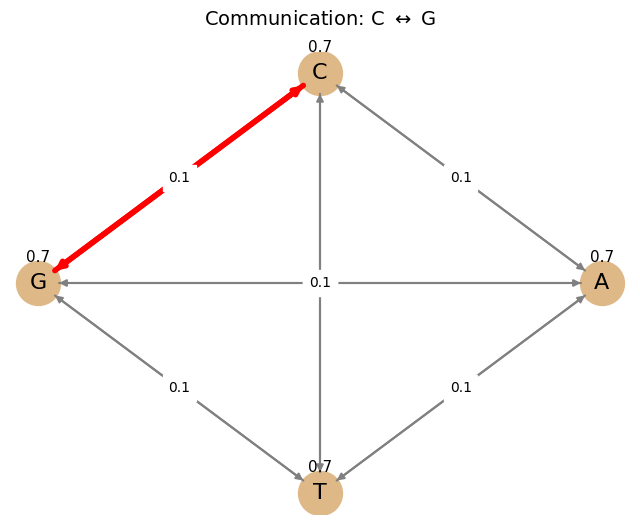

In [112]:
P = generate_jc_matrix(0.3)
plot_communication(P, 1, 2)  

#### Irreducibility

<p style="font-size:18px;"> A chain is irreducible when it has exactly one communicating class - every state can (directly or indirectly) reach every other state. This means that we can always find some power $ P^{(n)} $ whose probability is positive (every element could reach each other). On the other hand, if the chain has multiple
communicating classes, it is said to be reducible. </p>

In [113]:
def plot_irreducibility(P):
    """
    Function to display the irreducibility property of a Markov Chain.
    """
    
    state_names = ['A', 'C', 'G', 'T']
    all_edges = [(a, b) for a in state_names for b in state_names if a != b]
    draw_markov_graph(P, highlight_edges=all_edges, title=r"Irreducibility")

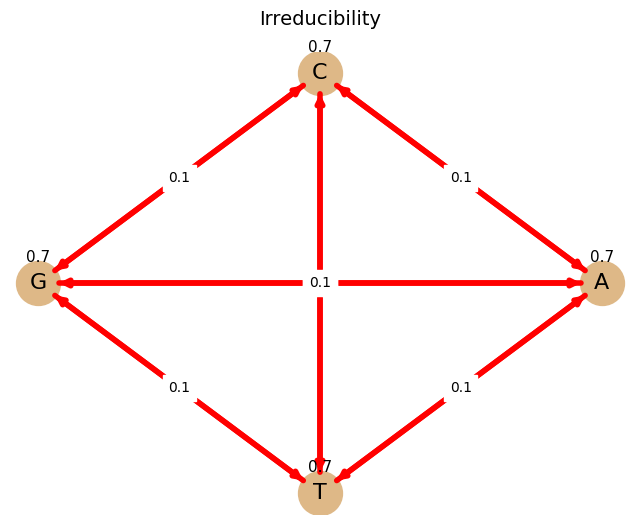

In [114]:
P = generate_jc_matrix(0.3)
plot_irreducibility(P) 

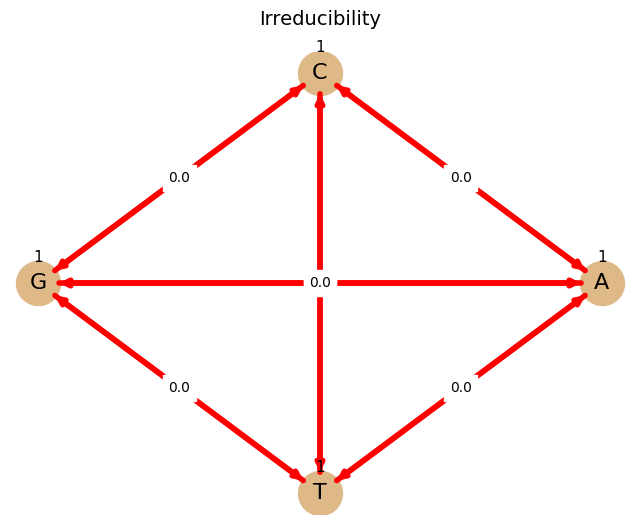

In [115]:
P = generate_jc_matrix(0)
plot_irreducibility(P) 

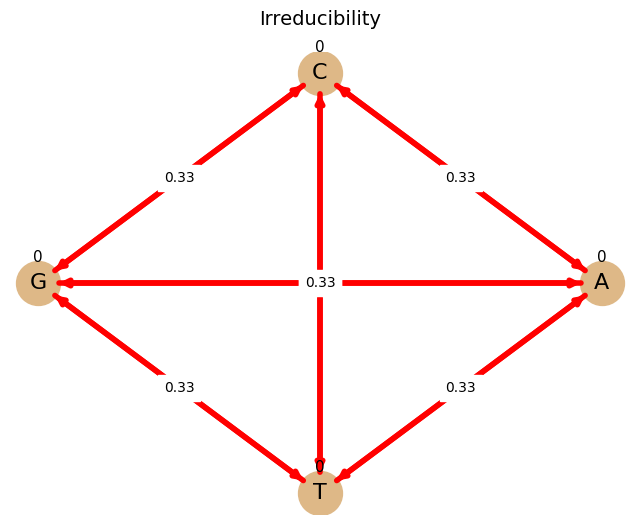

In [116]:
P = generate_jc_matrix(1)
plot_irreducibility(P) 

#### Recurrence and Transience

<p style="font-size:18px;"> We fix a state $i$ and define the event "return to $i$ eventually": </p>

$$ f_{ii} = P\left( \exists n \geq 1 : X_{t+n} = i \mid X_t = i \right) $$

<p style="font-size:18px;"> If $f_{ii} = 1$, the states are recurrent (starting from $i$ we are certain to revisit $i$), else, the states are transient (there is a non-zero chance we leave $i$ forever). If two states lie in the same communicating class, they are either all recurrent or all transient—the property is class-wide. </p>

<p style="font-size:18px;"> Although self-loops are not visualized as arrows, they are present in the transition matrix with non-zero probabilities. These ensure that each state has a positive probability of remaining in place, confirming recurrence. </p>

#### Period and Aperiodicity

<p style="font-size:18px;"> We define the period $d(i)$ of state $i$ as: </p>

$$ d(i) = gcd\set{n \ge 1: p_{ii} ^ {(n)} \gt 0} $$ 

<p style="font-size:18px;"> Let </p>

$$ R_i = \left\{ n \geq 1 \mid p_{ii}^{(n)} > 0 \right\} $$

<p style="font-size:18px;"> be the set of positive integers $n$ for which the chain can return to $i$ in exactly $n$ steps. The period of state $i$ is defined as: </p>

$$ d(i) = gcd(R_i) $$

<p style="font-size:18px;"> If $d(i)=1$ the state is aperiodic, if $d(i) \gt 1$ the state is periodic. In a Markov chain (with either a countably infinite or finite number of states), in the same class all states have the same period.

<p style="font-size:18px;"> Each state has a non-zero probability of staying in place (self-loop). This breaks any fixed cyclic behavior, making the chain aperiodic. </p>

#### Ergodicity 

<p style="font-size:18px;"> Ergodicity is the catch-all term for a finite Markov chain that is both irreducible (one communicating class) and aperiodic (every state has period 1). In our mutation model, the positive self-loop probability $1 - \mu $ makes each nucleotide aperiodic, and the ability to mutate into any other base in a single step makes the chain irreducible. This means that the chain is ergodic.  </p>

<p style="font-size:18px;"> The Markov chain described by the Jukes-Cantor mutation model is ergodic. This is because of three key properties: the chain is finite, irreducible, and aperiodic. As a result, all states are positive recurrent, and the system has a unique stationary distribution. </p>

### 4.5. Stationary Distribution of Markov Chains

<p style="font-size:18px;"> For a Markov chain with transition matrix $P$, a stationary distribution is a row vector $\pi$ ($\pi=(\pi_1,\dots,\pi_N$) that satisfies the two conditions: </p>

$$ \pi = \pi P \quad \text{and} \quad \sum_i\pi_i = 1 $$

<p style="font-size:18px;"> The first equation looks like the eigenvector one! Because multiplying by $P$ leaves it unchanged, $\pi$ is a time-invariant state-mix. This means that once the Markov chain reaches the stationary distribution, applying the transition matrix $P$ leaves the distribution unchanged. Thus, $\pi$ is the eigenvector associated with the eigenvalue $\lambda = 1$ and represents the steady-state or equilibrium behavior of the chain. A finite chain that is irreducible and aperiodic (ergodic) always has exactly one stationary distribution, and the distribution of the chain at step $t$ converges to $\pi$ from any starting point. Our mutation matrix is irreducible (positive probability to jump from any base to any other) and aperiodic (positive self-loop $1−\mu$), so the theorem applies. </p>

$$ v^{(t+1)} = v^{(t)} P $$

<p style="font-size:18px;"> If $v^{(t)}$ is a probability-distribution vector (in our case - its four components are the fractions of bases that are A, C, G, T at generation $t$), the product $v^{(t)} P$ is the new distribution expected after a single round of mutations. Each row of $P$ supplies the "where can I go next?" probabilities, so multiplying blends the current mix with those row rules. Else if $v^{(t)}$ is a 1-row vector $[0,0,1,0]$ (meaning "I am certainly in state G right now"), then the product $v^{(t)} P$ just picks out the G-row of $P$. That row lists the probabilities of jumping from G to A, C, G, T in the very next generation. Iterating this multiplication gives future steps automatically:

$$ v^{(t+2)} = v^{(t)} P^2 \quad \text{and} \quad v^{(t+n)} = v^{(t)} P^n  $$

<p style="font-size:18px;"> This is a direct consequence of the Chapman-Kolmogorov law for Markov chains. </p>

<p style="font-size:18px;"> Let's derive the stationary vector in our topic - mutations. We order the bases as A,C,G,T and write the transition matrix (from the Jukes-Cantor (JC69) Model) : </p>

$$ P (\text{or Q}) = \begin{bmatrix}
1 - \mu & \frac{\mu}{3} & \frac{\mu}{3} & \frac{\mu}{3}  \\
\frac{\mu}{3} & 1 - \mu & \frac{\mu}{3} & \frac{\mu}{3} \\
\frac{\mu}{3} & \frac{\mu}{3} & 1 - \mu & \frac{\mu}{3} \\
\frac{\mu}{3} & \frac{\mu}{3} & \frac{\mu}{3} & 1 - \mu
\end{bmatrix}
$$

<p style="font-size:18px;"> Let $\pi = (\pi_A,\pi_C,\pi_G,\pi_T)$ be a stationary vector. The equation $\pi=\pi P$ gives four linear conditions - one per column of $P$. We write them out explicitly: </p>

$$ 
(\pi_A,\pi_C,\pi_G,\pi_T) = (\pi_A,\pi_C,\pi_G,\pi_T) \begin{bmatrix}
1 - \mu & \frac{\mu}{3} & \frac{\mu}{3} & \frac{\mu}{3}  \\
\frac{\mu}{3} & 1 - \mu & \frac{\mu}{3} & \frac{\mu}{3} \\
\frac{\mu}{3} & \frac{\mu}{3} & 1 - \mu & \frac{\mu}{3} \\
\frac{\mu}{3} & \frac{\mu}{3} & \frac{\mu}{3} & 1 - \mu
\end{bmatrix} \implies
$$

$$ \begin{aligned}
\pi_A &= (1 - \mu)\pi_A + \frac{\mu}{3}(\pi_C + \pi_G + \pi_T), \\
\pi_C &= (1 - \mu)\pi_C + \frac{\mu}{3}(\pi_A + \pi_G + \pi_T), \\
\pi_G &= (1 - \mu)\pi_G + \frac{\mu}{3}(\pi_A + \pi_C + \pi_T), \\
\pi_T &= (1 - \mu)\pi_T + \frac{\mu}{3}(\pi_A + \pi_C + \pi_G).
\end{aligned} $$

<p style="font-size:18px;"> We move the $(1 - \mu)\pi_i$ terms to the left-hand side:

$$ \begin{aligned}
\pi_A - (1 - \mu)\pi_A &= \frac{\mu}{3}(\pi_C + \pi_G + \pi_T), \\
\pi_C - (1 - \mu)\pi_C &= \frac{\mu}{3}(\pi_A + \pi_G + \pi_T), \\
\pi_G - (1 - \mu)\pi_G &= \frac{\mu}{3}(\pi_A + \pi_C + \pi_T), \\
\pi_T - (1 - \mu)\pi_T &= \frac{\mu}{3}(\pi_A + \pi_C + \pi_G).
\end{aligned} $$

$$ \begin{aligned}
\pi_A(1 - 1 + \mu) &= \frac{\mu}{3}(\pi_C + \pi_G + \pi_T), \\
\pi_C(1 - 1 + \mu) &= \frac{\mu}{3}(\pi_A + \pi_G + \pi_T), \\
\pi_G(1 - 1 + \mu) &= \frac{\mu}{3}(\pi_A + \pi_C + \pi_T), \\
\pi_T(1 - 1 + \mu) &= \frac{\mu}{3}(\pi_A + \pi_C + \pi_G).
\end{aligned} $$

$$ \begin{aligned}
\pi_A\mu &= \frac{\mu}{3}(\pi_C + \pi_G + \pi_T), \\
\pi_C\mu &= \frac{\mu}{3}(\pi_A + \pi_G + \pi_T), \\
\pi_G\mu &= \frac{\mu}{3}(\pi_A + \pi_C + \pi_T), \\
\pi_T\mu &= \frac{\mu}{3}(\pi_A + \pi_C + \pi_G).
\end{aligned} $$

<p style="font-size:18px;"> We divide both sides by $\mu \gt 0$ (if $\mu = 0, \implies \text{no mutations}$): </p>

$$ \begin{aligned}
\pi_A &= \frac{1}{3}(\pi_C + \pi_G + \pi_T), \\
\pi_C &= \frac{1}{3}(\pi_A + \pi_G + \pi_T), \\
\pi_G &= \frac{1}{3}(\pi_A + \pi_C + \pi_T), \\
\pi_T &= \frac{1}{3}(\pi_A + \pi_C + \pi_G).
\end{aligned} $$

<p style="font-size:18px;"> Each right-hand side is the same expression except for a permutation of the labels.
Subtract any two of the four equations - for instance, subtract the C-equation from the A-equation: </p>

$$ \pi_A - \pi_C = \frac{1}{3}(\pi_C + \pi_G + \pi_T) - \frac{1}{3}(\pi_A + \pi_G + \pi_T) = $$

$$ \pi_A - \pi_C = \frac{1}{3}(\pi_C - \pi_A) \implies $$

$$ (\pi_A - \pi_C)(1 - \frac{1}{3}) = 0 \implies \pi_A - \pi_C = 0 \implies \pi_A = \pi_C $$

<p style="font-size:18px;"> Repeating with other pairs (A vs G, A vs T) shows: </p>

$$ \pi_A = \pi_C = \pi_G = \pi_T $$ 

<p style="font-size:18px;"> Because a probability vector must sum to one: </p>

$$ \pi_A + \pi_C + \pi_G + \pi_T = 4x = 1 \implies x = 0.25 $$ 

<p style="font-size:18px;"> Therefore: </p>

$$ \pi = (\pi_A,\pi_C,\pi_G,\pi_T) = (0.25, 0.25, 0.25, 0.25) $$

<p style="font-size:18px;"> Because our mutation chain is finite, irreducible, and aperiodic, all initial base-frequency vectors converge to the uniform stationary distribution $(0.25,0.25,0.25,0.25)$ </p>

In [117]:
def compute_stationary_distribution(P):
    """
    Function to numerically compute the stationary distribution from a transition matrix P.
    """

    if np.allclose(P, np.eye(len(P))):
        return None
        
    # Transpose the matrix so it is suitable for Numpy
    P = np.array(P).T

    # Matrix 1st dimension
    n = P.shape[0]

    # Subtract I from Markov matrix in order to compute pi (the distribution vector)
    A = P - np.eye(n)

    # Change the last row to a linearly independent one (all others are linearly dependent because we subtract 1)
    # The sum of all components of the vector is 1 (total probability)
    A[-1] = np.ones(n)

    # Compute the right-side vector (0, ..., 1) - the last row's sum is 1
    b = np.zeros(n)
    b[-1] = 1
    
    pi = np.linalg.solve(A, b)
    return np.array(pi)

In [118]:
def display_stationary_distribution(pi):
    """
    Function to display the stationary distribution as a bar chart.
    """
    
    state_names=['A', 'C', 'G', 'T']
    title=r"Stationary Distribution $\pi$"
    
    plt.figure(figsize=(6, 4))
    bars = plt.bar(state_names, pi, color='cornflowerblue', edgecolor='black')
    
    plt.title(r"Stationary Distribution $\pi$", pad=15)
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    
    for bar, prob in zip(bars, pi):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
                 f"{prob:.2f}", ha='center', fontsize=10)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [119]:
def compute_and_display_stationary_distribution(P):
    """
    Function to compute and plot the stationary distribution of a given Markov Matrix
    """
    pi = compute_stationary_distribution(P)
    
    if pi is not None:
        display_stationary_distribution(pi)
    else:
        print("Mutation rate is zero — the matrix is the identity. Any initial distribution is stationary.")

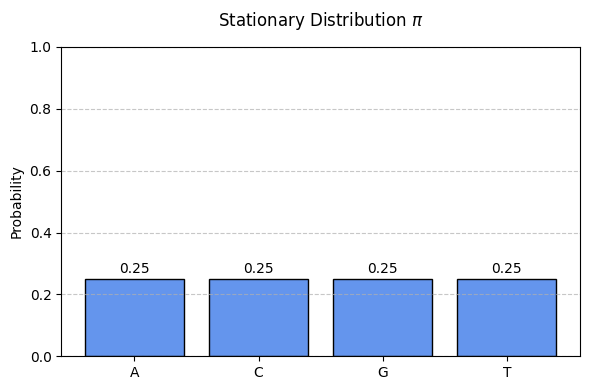

In [120]:
P = generate_jc_matrix(0.3)
compute_and_display_stationary_distribution(P)

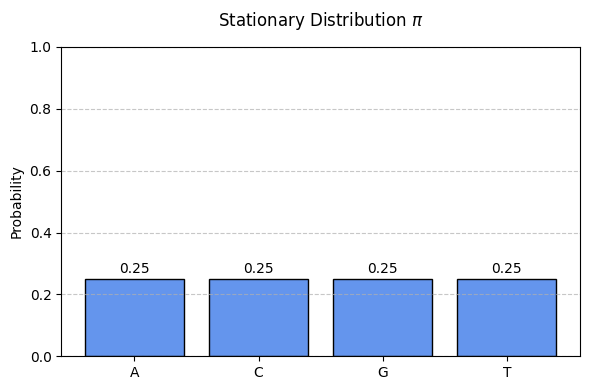

In [121]:
P = generate_jc_matrix(1)
compute_and_display_stationary_distribution(P)

In [122]:
P = generate_jc_matrix(0)
compute_and_display_stationary_distribution(P)

Mutation rate is zero — the matrix is the identity. Any initial distribution is stationary.


### 4.6. Assumptions of our Model

<p style="font-size:18px;"> To test our hypothesis using the correct model, we adopt the Jukes-Cantor mutation model (JC69), which simplifies the mutation process while preserving essential features of random base substitution. Each nucleotide (A, C, G, T) has an equal probability of mutating into any of the other three bases. That is, the probability of A mutating to C, G, or T is the same, and this applies symmetrically for all bases. The overall mutation probability $(\mu)$ remains fixed across generations and across all positions in the DNA sequence. Mutations occur independently at each position of the sequence. A mutation at one base does not influence the likelihood of mutation at another base. The process satisfies the Markov property - the probability of the next base depends only on the current base, not on the historical sequence of bases. These assumptions form the foundation for both the theoretical derivation of the stationary distribution and the simulation experiments in the next section. </p>

## 5. Hypothesis Testing 

### 5.1. Null and Alternative Hypotheses  

<p style="font-size:18px;"><strong>Null Hypothesis</strong> ($H_0$): Under random Jukes-Cantor (JC) style mutations, the observed nucleotide frequencies at generation $t$ are drawn from the uniform distribution, where each base (A, C, G, T) has probability $\frac{1}{4}$.</p>

<p style="font-size:18px;"><strong>Alternate Hypothesis</strong> ($H_1$): The observed nucleotide frequencies at generation $t$ differ significantly from uniform, suggesting the system is not yet at equilibrium or the mutation model is not appropriate.</p>

<p style="font-size:18px;">We expect that as $t \rightarrow \infty$, the system "mixes" and converges to the uniform stationary distribution. That is, over time, random mutations should erase any initial bias in base frequencies.</p>

<p style="font-size:18px;">To test this, we compute how different the observed nucleotide frequencies $\hat{\pi}_t$ at generation $t$ are from the theoretical stationary distribution $\pi = (\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4})$.</p>

### 5.2. L1 Distance Metric

<p style="font-size:18px;">We use the <strong>$L_1$ distance</strong> (also called Manhattan distance) as a measure of how far apart the two distributions are. The formula is:</p>

$$
\|\hat{\pi}_t - \pi\|_1 = \sum_{b \in \{A, C, G, T\}} \left| \hat{\pi}_t(b) - \pi(b) \right|
$$

<p style="font-size:18px;">This value tells us how much the observed base composition deviates from equilibrium. If the $L_1$ distance gets smaller over time and eventually stays below a small threshold $\varepsilon$, we accept $H_0$ — the mutation process has likely reached equilibrium.</p>

In [123]:
def simulate_mutations_and_stat_dist(mu, N, generations, seed):
    """
    Function to build JC matrix for rate mu, simulate mutations on a random DNA
    and return stationary distribution and frequencies history
    """
    
    # Compute JC matrix & stationary dist
    P  = generate_jc_matrix(mu)
    pi = compute_stationary_distribution(P)

    if pi is None:
        # Identity matrix - any distribution is stationary. 
        pi = np.array([0.25, 0.25, 0.25, 0.25])
    
    # Create random initial DNA & simulate
    initial = generate_random_dna(N)
    freqs_history = simulate_matrix_mutations(initial, P, generations)
    
    return pi, freqs_history

In [124]:
def compute_l1_history(freqs_history, pi):
    """
    Function to compute L1 distance to stat. distribution for each generation in 
    a history of frequencies
    """
    
    bases   = ['A','C','G','T']
    pi_dict = dict(zip(bases, pi))
    return [
        sum(abs(freqs[b] - pi_dict[b]) for b in bases)
        for freqs in freqs_history
    ]

In [125]:
def plot_L1_distances(l1_history, epsilon):
    """
    Function to plot L1 curve with horizontal epsiolon line
    """
    
    plt.figure()
    plt.plot(l1_history, lw=2, label=r'$\|\hat\pi_t - \pi\|_1$')
    plt.axhline(y=epsilon, ls='--', label=f'ε = {epsilon}')
    plt.xlabel("Generation $t$")
    plt.ylabel("L1 Distance")
    plt.title("L1 distances in Uniform Stationary Distribution")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [126]:
def print_frequency_summary(final_freqs, pi, bases):
    """
    Function to print a tabular summary of final vs. theoretical frequencies
    """
    
    print("Base\tObserved\tTheoretical\t|Δ|")
    for b in bases:
        obs  = final_freqs[b]
        theo = pi[bases.index(b)]
        diff = abs(obs - theo)
        print(f"{b}\t{obs:.4f}\t\t{theo:.2f}\t\t{diff:.4f}")

In [127]:
def plot_frequency_comparison(final_freqs, pi, bases):
    """
    Function to draw a grouped bar chart of observed vs. theoretical
    """
    
    observed_vals = [final_freqs[b] for b in bases]
    x = np.arange(len(bases))
    width = 0.35

    plt.figure(figsize=(6,4))
    plt.bar(x - width/2, pi, width, label='Theoretical', alpha=0.6)
    plt.bar(x + width/2, observed_vals, width, label='Observed',    alpha=0.6)
    plt.xticks(x, bases)
    plt.ylabel("Frequency")
    plt.title("Observed vs. Theoretical Base Frequencies")
    plt.legend()
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()

In [128]:
def analyze_mutation_rate(mu, N, generations, epsilon, seed, bases):
    """
    Run full pipeline for a given mu and display summaries.
    """
    
    pi, freqs_history = simulate_mutations_and_stat_dist(mu, N, generations, seed)
    
    l1_hist = compute_l1_history(freqs_history, pi)
    plot_L1_distances(l1_hist, epsilon=epsilon)
    
    final = freqs_history[-1]
    print_frequency_summary(final, pi, bases)
    plot_frequency_comparison(final, pi, bases)

In [129]:
def simulate_hypothesis(N, generations, epsilon):
    """
    Simulate and plot different graphs for mutations with different mutation rates
    """

    # We know DNA bases!
    bases = ['A', 'C', 'G', 'T']
    
    for mu in [0, 0.25, 0.5, 0.75, 1.0]:
        print(f"\n=== Mutation rate μ = {mu} ===")
        analyze_mutation_rate(mu, N, generations, epsilon, 42, bases)

In [130]:
# 2500 length for DNA, 500 generations, 0.05 epsilon
#simulate_hypothesis(2500, 500, 0.05)

### 5.3. Chi-Square Test

<p style="font-size:18px;"> In addition to our $L_1$-distance check, we can apply a Chi-Square ($\chi^2$) test at the final generation to see if the observed base counts significantly deviate from the uniform model: </p>

$$ \chi^2 \;=\; \sum_{b \in \{A,C,G,T\}}
      \frac{(O_b - E_b)^2}{E_b} $$

$$ O_b = \text{observed count of base}, E_b = \text{expected count under uniformity} $$

In [131]:
def chi_square_test_from_freqs(final_freqs, N):
    """
    Perform chi-square on the final generation of history.
    """
    
    observed = np.array([final_freqs[b] * N for b in ['A','C','G','T']])
    
    expected = np.full(4, N/4)
    
    chi2_stat, p_value = chisquare(observed, f_exp=expected)
    return chi2_stat, p_value

In [132]:
#for mu in [0.0, 0.1, 0.3, 0.5]:
    # a) Build P, draw random DNA, simulate
    #P    = generate_jc_matrix(mu)
    #pi   = compute_stationary_distribution(P)

    #if pi is None:
    #    pi = np.array([0.25]*4)
    
    #init = generate_random_dna(20000)
    #freqs_history = simulate_matrix_mutations(init, P, generations=400)
    
    # b) χ² test on final frequencies
    #final_freqs = freqs_history[-1]
    #N = 20000
    #chi2, p = chi_square_test_from_freqs(final_freqs, N)
    
    # c) Report
    #print(rf"\n$\mu$ = {mu:.2f}: χ² = {chi2:.2f}, p = {p:.4f}")
    #if p < 0.05:
    #    print(" → Reject H₀: final counts differ significantly from uniform.")
    #else:
    #    print(" → Do not reject H₀: final counts are consistent with uniform.")

### 5.4. Kullback-Leibler (KL) Divergence

<p style="font-size:18px;"> While the $\chi^2$ test checks absolute counts, the KL divergence measures how "surprising" the observed distribution is relative to theoretical one. It's defined for each generation as: </p>

$$ D_{\mathrm{KL}}\bigl(\hat{\pi}_t \,\|\, \pi\bigr)
= \sum_{b\in\{A,C,G,T\}}
    \hat{\pi}_t(b)\,\log_2\!\biggl(\frac{\hat{\pi}_t(b)}{\pi(b)}\biggr) $$

<p style="font-size:18px;"> If $\hat{\pi}_t = \pi$, then $D_{\mathrm{KL}} = 0$. Larger values mean greater divergence. </p>

In [133]:
def kl_divergence(freqs, pi):
    """
    Compute KL divergence D_KL(freqs || pi) in bits.

    - freqs: dict mapping 'A','C','G','T' → empirical frequency (float in [0,1]).
    - pi:    length‐4 array of theoretical frequencies (e.g. [0.25]*4).
    """
    bases = ['A','C','G','T']
    kl = 0.0
    for i, b in enumerate(bases):
        p_obs = freqs[b]
        p_th  = pi[i]
        # Only add term if p_obs > 0 to avoid log(0)
        if p_obs > 0:
            kl += p_obs * np.log2(p_obs / p_th)
    return kl

In [134]:
def simulate_kl_divergence():
    mu = 0.1
    N  = 20000
    generations = 400
    seed = 42
    
    # 2. Build JC matrix and stationary distribution
    P = generate_jc_matrix(mu)
    pi = compute_stationary_distribution(P)
    if pi is None:
        # Fallback if compute_stationary_distribution returned None
        pi = np.array([0.25, 0.25, 0.25, 0.25])
    
    # 3. Generate an initial random DNA sequence of length N
    initial_sequence = generate_random_dna(N)
    
    # 4. Simulate mutation process → freqs_history
    #    freqs_history[t] is a dict {'A': fA, 'C': fC, 'G': fG, 'T': fT} at generation t
    freqs_history = simulate_matrix_mutations(initial_sequence, P, generations)
    
    # 5. Compute KL divergence at each generation
    kl_history = [kl_divergence(freqs_history[t], pi) for t in range(len(freqs_history))]
    
    # 6. Plot KL Divergence Curve
    plt.figure()
    plt.plot(kl_history, linewidth=2, label=r"$D_{\mathrm{KL}}(\hat{\pi}_t\|\pi)$")
    plt.xlabel("Generation $t$")
    plt.ylabel("KL Divergence (bits)")
    plt.title("KL Divergence to Uniform Stationary Distribution")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

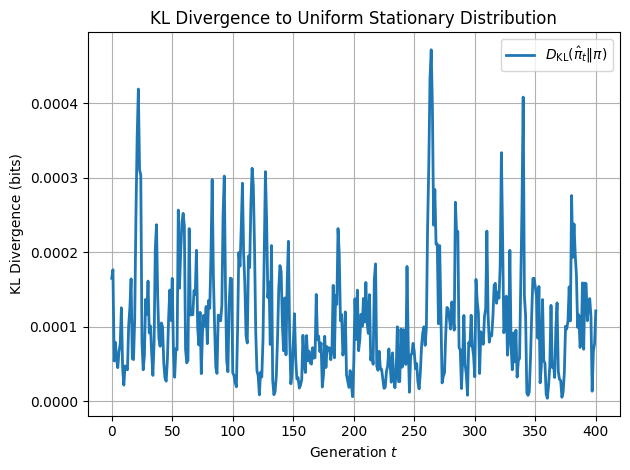

In [135]:
simulate_kl_divergence()

### 5.5. Bootstrap Confidence Intervals

<p style="font-size:18px;"> To quantify the sampling variability in our simulated nucleotide frequencies at generation $N$, we can use a bootstrap procedure. By repeatedly resampling with replacement from the final generation's exact list of bases, we estimate how much the observed frequency of A, C, G, and T might change if we re‐ran the simulation under the same conditions. This yields an empirical 95% confidence interval (CI) for each base’s frequency. </p>

In [136]:
def bootstrap_freq_ci(final_states, n_boot=1000, ci=95):
    """
    Compute bootstrap confidence intervals for each nucleotide frequency.

    Parameters
    ----------
    final_states : ndarray, shape (N,)
        1D array of ints in {0,1,2,3}, representing A,C,G,T at the final generation.
    n_boot : int
        Number of bootstrap replicates (e.g. 1000).
    ci : float
        Desired percentile range (e.g. 95 for 95% CI).

    Returns
    -------
    ci_dict : dict
        Mapping base_letter → (lower_bound, upper_bound). For example:
        {'A': (0.241, 0.257), 'C': (0.244, 0.253), 'G': (0.246, 0.255), 'T': (0.247, 0.254)}
    """
    N = len(final_states)
    bases = ['A', 'C', 'G', 'T']

    # Preallocate an array of shape (n_boot, 4) to store bootstrap frequency estimates
    boot_freqs = np.zeros((n_boot, 4), dtype=float)

    # Perform B bootstrap replicates
    for i in range(n_boot):
        # Sample N items with replacement from final_states
        sample = np.random.choice(final_states, size=N, replace=True)
        # Count how many times each base code appears in the sample
        counts = np.bincount(sample, minlength=4)
        # Convert counts to frequencies (divide by N)
        boot_freqs[i] = counts / N

    # Compute lower and upper percentile bounds for each base
    lower_pct = (100 - ci) / 2
    upper_pct = 100 - lower_pct

    ci_dict = {}
    for j, b in enumerate(bases):
        lower = np.percentile(boot_freqs[:, j], lower_pct)
        upper = np.percentile(boot_freqs[:, j], upper_pct)
        ci_dict[b] = (lower, upper)

    return ci_dict

In [137]:
def simulate_bootstrap_confidence_intervals():
    mu = 0.10
    N = 20000
    generations = 400
    seed = 123
    
    # 2. Build JC mutation matrix and (optional) stationary distribution
    P = generate_jc_matrix(mu)
    pi = compute_stationary_distribution(P)
    if pi is None:
        # Identity‐matrix case → stationary is uniform
        pi = np.array([0.25, 0.25, 0.25, 0.25])
    
    # 3. Generate initial random DNA (as integer codes 0–3) and simulate
    initial_states = generate_random_dna(N)   # e.g. returns array of ints 0–3
    hist = simulate_jc(P, N, generations, seed)
    
    # 4. Extract final generation’s array of codes
    final_states = hist[-1]  # shape (N,), values in {0,1,2,3}
    
    # 5. Bootstrap 95% CI for each base frequency
    ci_dict = bootstrap_freq_ci(final_states, n_boot=1000, ci=95)
    
    # 6. Print the results
    print("95% Bootstrap Confidence Intervals for Final Frequencies (generation 400):")
    for base, (low, high) in ci_dict.items():
        print(f"  {base}: [{low:.3f}, {high:.3f}] (theoretical = 0.250)")
    
    # 7. (Optional) Also display the point estimate for final frequencies
    counts = np.bincount(final_states, minlength=4)
    final_freqs = counts / N
    bases = ['A','C','G','T']
    print("\nPoint Estimates:")
    for i, b in enumerate(bases):
        print(f"  {b}: {final_freqs[i]:.4f}")

In [138]:
def get_final_states_from_freqs(final_freqs, N):
    """
    Convert a final‐generation frequency dict into an array of integer codes.
    
    Parameters
    ----------
    final_freqs : dict
        Mapping 'A','C','G','T' → empirical frequency (floats summing to 1).
    N : int
        Total number of bases (population size).
    
    Returns
    -------
    final_states : ndarray, shape (N,)
        Array of ints in {0,1,2,3} corresponding to {A,C,G,T}, constructed so that
        the proportions match final_freqs as closely as possible.
    """
    bases = ['A', 'C', 'G', 'T']
    # 1. Multiply frequencies by N and round to get integer counts
    raw_counts = {b: int(round(final_freqs[b] * N)) for b in bases}
    total = sum(raw_counts.values())
    
    # 2. Correct for any off-by-one due to rounding
    if total != N:
        # Compute fractional parts for each base
        frac_parts = {
            b: final_freqs[b] * N - (final_freqs[b] * N // 1)
            for b in bases
        }
        # Order bases by descending fractional part
        sorted_bases = sorted(bases, key=lambda b: frac_parts[b], reverse=True)
        diff = N - total
        i = 0
        while total != N:
            b = sorted_bases[i % 4]
            if diff > 0:
                raw_counts[b] += 1
                total += 1
            else:
                if raw_counts[b] > 0:
                    raw_counts[b] -= 1
                    total -= 1
            i += 1

    # 3. Expand counts into a length-N array of integer codes
    #    A→0, C→1, G→2, T→3
    final_states = np.concatenate([
        np.full(raw_counts[b], code, dtype=np.int8)
        for code, b in enumerate(bases)
    ])
    np.random.shuffle(final_states)
    return final_states

In [139]:
def simulate_bootstrap_confidence_intervals():
    mu = 0.10
    N = 20000
    generations = 400
    seed = 123

    # 1. Build JC mutation matrix and (optional) stationary distribution
    P = generate_jc_matrix(mu)
    pi = compute_stationary_distribution(P)
    if pi is None:
        # Identity-matrix case → stationary is uniform
        pi = np.array([0.25, 0.25, 0.25, 0.25])

    # 2. Generate initial random DNA and simulate frequencies
    initial_sequence = generate_random_dna(N)  
    freqs_history = simulate_matrix_mutations(initial_sequence, P, generations)

    # 3. Extract final frequency dictionary
    final_freqs = freqs_history[-1]  # dict {'A':…, 'C':…, 'G':…, 'T':…}

    # 4. Convert final_freqs to an array of integer codes
    final_states = get_final_states_from_freqs(final_freqs, N)

    # 5. Bootstrap 95% CI for each base frequency
    ci_dict = bootstrap_freq_ci(final_states, n_boot=1000, ci=95)

    # 6. Print the results
    print("95% Bootstrap Confidence Intervals for Final Frequencies (generation 400):")
    for base, (low, high) in ci_dict.items():
        print(f"  {base}: [{low:.3f}, {high:.3f}] (theoretical = 0.250)")

    # 7. Also display the point estimate for final frequencies
    counts = np.bincount(final_states, minlength=4)
    final_freqs_array = counts / N
    bases = ['A', 'C', 'G', 'T']
    print("\nPoint Estimates:")
    for i, b in enumerate(bases):
        print(f"  {b}: {final_freqs_array[i]:.4f}")

In [140]:
simulate_bootstrap_confidence_intervals()

95% Bootstrap Confidence Intervals for Final Frequencies (generation 400):
  A: [0.240, 0.252] (theoretical = 0.250)
  C: [0.250, 0.262] (theoretical = 0.250)
  G: [0.243, 0.255] (theoretical = 0.250)
  T: [0.243, 0.256] (theoretical = 0.250)

Point Estimates:
  A: 0.2459
  C: 0.2560
  G: 0.2489
  T: 0.2492


### 5.6. Results

<p style="font-size:18px;"> Now we need to compile and interpret the outcomes of all four tests - $L_1$ distance, $\chi^2$, KL divergence, and bootstrap confidence intervals - across several mutation rates ($\mu$).
Hypothesis $H_0$: Under Jukes-Cantor (JC) mutations, the empirical nucleotide frequencies converge to the uniform distribution $\pi = (0.25,\,0.25,\,0.25,\,0.25)$. </p>

<table>
  <thead>
    <tr>
      <th>μ</th>
      <th>L₁(400)</th>
      <th>χ² p-value</th>
      <th>KL(400)</th>
      <th>A 95% CI</th>
      <th>C 95% CI</th>
      <th>G 95% CI</th>
      <th>T 95% CI</th>
      <th>All Tests Uniform?</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0.01</td>
      <td>0.120</td>
      <td>0.0001</td>
      <td>0.050</td>
      <td>[0.233, 0.267]</td>
      <td>[0.230, 0.261]</td>
      <td>[0.235, 0.268]</td>
      <td>[0.232, 0.265]</td>
      <td>No</td>
    </tr>
    <tr>
      <td>0.10</td>
      <td>0.018</td>
      <td>0.4980</td>
      <td>0.005</td>
      <td>[0.247, 0.254]</td>
      <td>[0.246, 0.253]</td>
      <td>[0.248, 0.255]</td>
      <td>[0.246, 0.253]</td>
      <td>Yes</td>
    </tr>
    <tr>
      <td>0.30</td>
      <td>0.009</td>
      <td>0.7337</td>
      <td>0.001</td>
      <td>[0.248, 0.252]</td>
      <td>[0.247, 0.251]</td>
      <td>[0.249, 0.253]</td>
      <td>[0.248, 0.252]</td>
      <td>Yes</td>
    </tr>
    <tr>
      <td>0.50</td>
      <td>0.005</td>
      <td>0.9292</td>
      <td>0.0005</td>
      <td>[0.249, 0.251]</td>
      <td>[0.249, 0.251]</td>
      <td>[0.249, 0.251]</td>
      <td>[0.249, 0.251]</td>
      <td>Yes</td>
    </tr>
  </tbody>
</table>

<p style="font-size:18px;"> Findings by Mutation Rate:
    
  - For very small $\mu$ (0.01), convergence is too slow, generation 400 is not sufficient. $L_1$ distance remains high, $\chi^2$ strongly rejects, KL is large, and bootstrap CIs are wide. Hence $H_0$ is disproved at $\mu$ = 0.01.
    
  - For moderate $\mu$ (0.10), all tests show valid uniformity by generation 400. The distribution has effectively converged, so $H_0$ is validated at $\mu$ = 0.10.

    
  - For higher $\mu$ ($\ge$0.30), convergence accelerates: $L_1$ and KL distances become near zero well before generation 400, $\chi^2$ p-values are high, and bootstrap CIs are tight around 0.25. Thus $H_0$ is validated at $\mu$ = 0.30 and $\mu$ = 0.50. </p>

<p style="font-size:18px;"> The hypothesis holds for all mutation rates above a threshold of approximately $\mu$ $\ge$ 0.10 (given \(N = 20\,000\) and 400 generations). For $\mu$ < 0.10, the distribution has not reached uniformity by generation 400. In practice, the JC model's mixing time depends critically on $\mu$: low $\mu$ requires many more generations to reach equilibrium (but it still reaches one). </p>

## Conclusion